# INTRODUCTION

Dataset: https://www.kaggle.com/olistbr/brazilian-ecommerce

Olist is an online platform where you can post or find job vacancies and dream house to buy or rent.
You can buy and sell online: used cars, real estate property, phones, fashion items such as clothing and shoes, electronics, vehicles, etc on OList..


#TOPIC: PRODUCT ANALYSIS

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
product = pd.read_csv('/content/gdrive/MyDrive/Olist-Dataset/olist_products_dataset.csv')
translation = pd.read_csv('/content/gdrive/MyDrive/Olist-Dataset/product_category_name_translation.csv')
order_items = pd.read_csv('/content/gdrive/MyDrive/Olist-Dataset/olist_order_items_dataset.csv')

In [ ]:
order = pd.read_csv('/content/gdrive/MyDrive/Olist-Dataset/olist_orders_dataset.csv')

In [ ]:
customer = pd.read_csv('/content/gdrive/MyDrive/Olist-Dataset/olist_customers_dataset.csv')

In [ ]:
location = pd.read_csv('/content/gdrive/MyDrive/Olist-Dataset/olist_geolocation_dataset.csv')

In [ ]:
reviews = pd.read_csv('/content/gdrive/MyDrive/Olist-Dataset/olist_order_reviews_dataset.csv')

In [ ]:
sellers = pd.read_csv('/content/gdrive/MyDrive/Olist-Dataset/olist_sellers_dataset.csv')

In [ ]:
payments = pd.read_csv('/content/gdrive/MyDrive/Olist-Dataset/olist_order_payments_dataset.csv')

# Overview Data

In [ ]:
sellers['seller_id'].nunique()

3095

## Cleaning Product Data

In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
#check for missing data
list(product['product_category_name'].unique())

['perfumaria',
 'artes',
 'esporte_lazer',
 'bebes',
 'utilidades_domesticas',
 'instrumentos_musicais',
 'cool_stuff',
 'moveis_decoracao',
 'eletrodomesticos',
 'brinquedos',
 'cama_mesa_banho',
 'construcao_ferramentas_seguranca',
 'informatica_acessorios',
 'beleza_saude',
 'malas_acessorios',
 'ferramentas_jardim',
 'moveis_escritorio',
 'automotivo',
 'eletronicos',
 'fashion_calcados',
 'telefonia',
 'papelaria',
 'fashion_bolsas_e_acessorios',
 'pcs',
 'casa_construcao',
 'relogios_presentes',
 'construcao_ferramentas_construcao',
 'pet_shop',
 'eletroportateis',
 'agro_industria_e_comercio',
 nan,
 'moveis_sala',
 'sinalizacao_e_seguranca',
 'climatizacao',
 'consoles_games',
 'livros_interesse_geral',
 'construcao_ferramentas_ferramentas',
 'fashion_underwear_e_moda_praia',
 'fashion_roupa_masculina',
 'moveis_cozinha_area_de_servico_jantar_e_jardim',
 'industria_comercio_e_negocios',
 'telefonia_fixa',
 'construcao_ferramentas_iluminacao',
 'livros_tecnicos',
 'eletrodomesti

In [ ]:
#filter null value
product[product.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
#check for null value
product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
#drop null values
product.dropna(inplace=True)

In [ ]:
#after drop
product.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [ ]:
product.duplicated().sum()

0

In [ ]:
product['product_id'].duplicated().sum()

0

* OList have 32340 products and 73 categories in their platform (from 2016-2018)

In [ ]:
product.shape[0]

32340

In [ ]:
#overview english translation table
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
translation['product_category_name_english'].nunique()

71

In [ ]:
product['product_category_name'].nunique()

73

* There are two categories still missing in translation data

In [ ]:
cate1 = {'product_category_name': 'pc_gamer',
             'product_category_name_english': 'pc_gamer'}
cate2 = {'product_category_name': 'portateis_cozinha_e_preparadores_de_alimentos',
         'product_category_name_english': 'kitchen_portables_and_food_preparators'}
translation = translation.append(cate1, ignore_index=True)
translation = translation.append(cate2, ignore_index=True)

In [ ]:
translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services
71,pc_gamer,pc_gamer


In [ ]:
translation['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [ ]:
translation['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [ ]:
product_english = pd.merge(translation, product, how='inner', on='product_category_name')
product_english.head()

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0


In [ ]:
product_english.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
#find top 10 product category
category_count = product_english['product_category_name_english'].value_counts().reset_index()
category_count.rename(columns={'index':'Category', 'product_category_name_english':'Count'}, inplace=True)
category_count

,Category,Count
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
...,...,...
68,home_comfort_2,5
69,fashion_childrens_clothes,5
70,pc_gamer,3
71,security_and_services,2


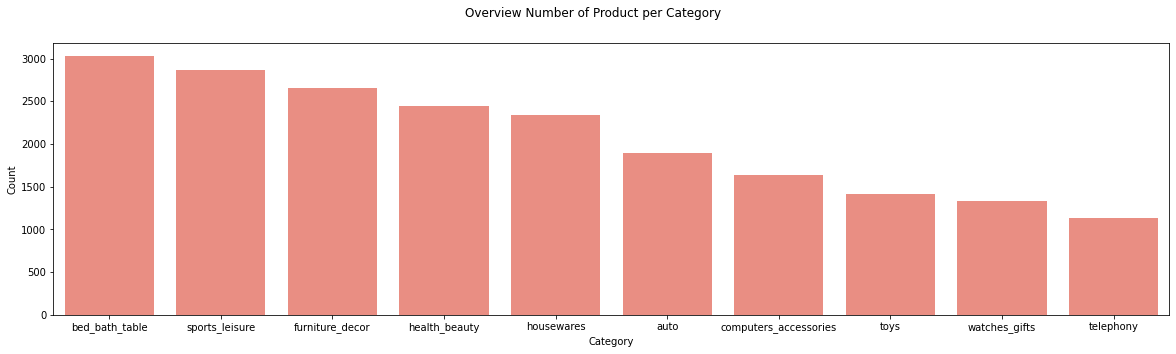

In [ ]:
#top 10 product category in store count visualization
plt.figure(figsize=(20,5))
plt.suptitle('Overview Number of Product per Category')

sns.barplot(data=category_count, x='Category', y='Count', color='salmon')
plt.xlim(-0.5,9.5)

plt.show()

### Merge Order_items table

In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
order_items.duplicated().sum()

0

In [ ]:
#change datatype to datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
product_order = pd.merge(product_english[['product_category_name_english',
                                          'product_id', 'product_name_lenght',
                                          'product_description_lenght', 
                                          'product_photos_qty', 
                                          'product_weight_g', 
                                          'product_length_cm',
                                          'product_height_cm', 
                                          'product_width_cm']], order_items, on='product_id', how='left')
product_order.rename(columns={'product_category_name_english': 'category'},inplace=True)
product_order

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111041,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,53fa17c349c4b3dcbbadd8aad2eb559b,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,21.52,23.30
111042,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,67f38c0b9d8a42541af92de7b6a19ea5,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 17:15:17,21.52,8.90
111043,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,b35a771164a9defa3b4767f1b66918b1,1,ed8cb7b190ceb6067227478e48cf8dde,2018-07-31 02:50:18,21.52,8.90
111044,kitchen_portables_and_food_preparators,a4756663d007b0cd1af865754d08d968,60.0,1304.0,4.0,650.0,22.0,6.0,14.0,0745fd0c5e5bd55f752798a152b1d04b,1,7aa538dd6e114e503a2e6154ea352253,2018-08-23 04:30:19,83.90,19.78


### Merge Order table

In [ ]:
product_order

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111041,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,53fa17c349c4b3dcbbadd8aad2eb559b,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,21.52,23.30
111042,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,67f38c0b9d8a42541af92de7b6a19ea5,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 17:15:17,21.52,8.90
111043,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,b35a771164a9defa3b4767f1b66918b1,1,ed8cb7b190ceb6067227478e48cf8dde,2018-07-31 02:50:18,21.52,8.90
111044,kitchen_portables_and_food_preparators,a4756663d007b0cd1af865754d08d968,60.0,1304.0,4.0,650.0,22.0,6.0,14.0,0745fd0c5e5bd55f752798a152b1d04b,1,7aa538dd6e114e503a2e6154ea352253,2018-08-23 04:30:19,83.90,19.78


In [ ]:
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
order.duplicated().sum()

0

In [ ]:
product_orders = pd.merge(product_order, order, how='left', on='order_id')
product_orders

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05 00:00:00
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-03-07 22:38:47,2018-03-14 14:38:53,2018-04-12 00:00:00
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-02 17:49:51,2017-08-10 20:04:29,2017-08-30 00:00:00
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-02-08 23:08:10,2018-02-21 14:35:19,2018-03-16 00:00:00
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-12 13:35:14,2018-08-13 17:57:00,2018-08-21 21:16:33,2018-09-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111041,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,53fa17c349c4b3dcbbadd8aad2eb559b,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,21.52,23.30,de4347cfed448a35884a19949bc53087,delivered,2018-07-27 13:09:23,2018-07-27 13:43:56,2018-07-27 17:58:00,2018-08-09 13:44:54,2018-08-21 00:00:00
111042,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,67f38c0b9d8a42541af92de7b6a19ea5,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 17:15:17,21.52,8.90,46ae9e1a0e2b936715ed2634a524f8ab,delivered,2018-07-27 16:59:35,2018-07-27 17:15:17,2018-07-30 12:17:00,2018-08-01 16:08:40,2018-08-06 00:00:00
111043,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,b35a771164a9defa3b4767f1b66918b1,1,ed8cb7b190ceb6067227478e48cf8dde,2018-07-31 02:50:18,21.52,8.90,db72b1bc11dfa3a7d4dc04332a77b651,delivered,2018-07-23 00:49:15,2018-07-25 02:50:18,2018-07-25 13:32:00,2018-08-03 10:03:31,2018-07-31 00:00:00
111044,kitchen_portables_and_food_preparators,a4756663d007b0cd1af865754d08d968,60.0,1304.0,4.0,650.0,22.0,6.0,14.0,0745fd0c5e5bd55f752798a152b1d04b,1,7aa538dd6e114e503a2e6154ea352253,2018-08-23 04:30:19,83.90,19.78,c24fc4f24d2c6bd64d612774f52d6a97,delivered,2018-08-17 15:45:42,2018-08-21 04:30:19,2018-08-21 14:53:00,2018-08-30 16:08:27,2018-09-19 00:00:00


### Merge Sellers

In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers.duplicated().sum()

0

In [ ]:
final_products_sellers = pd.merge(product_orders, sellers, on='seller_id', how='left')
final_products_sellers 

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05 00:00:00,94451,viamao,RS
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-03-07 22:38:47,2018-03-14 14:38:53,2018-04-12 00:00:00,78020,cuiaba,MT
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-02 17:49:51,2017-08-10 20:04:29,2017-08-30 00:00:00,78020,cuiaba,MT
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-02-08 23:08:10,2018-02-21 14:35:19,2018-03-16 00:00:00,18683,lencois paulista,SP
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-12 13:35:14,2018-08-13 17:57:00,2018-08-21 21:16:33,2018-09-12 00:00:00,86050,londrina,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111041,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,53fa17c349c4b3dcbbadd8aad2eb559b,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,21.52,23.30,de4347cfed448a35884a19949bc53087,delivered,2018-07-27 13:09:23,2018-07-27 13:43:56,2018-07-27 17:58:00,2018-08-09 13:44:54,2018-08-21 00:00:00,11015,santos,SP
111042,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,67f38c0b9d8a42541af92de7b6a19ea5,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 17:15:17,21.52,8.90,46ae9e1a0e2b936715ed2634a524f8ab,delivered,2018-07-27 16:59:35,2018-07-27 17:15:17,2018-07-30 12:17:00,2018-08-01 16:08:40,2018-08-06 00:00:00,11015,santos,SP
111043,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,b35a771164a9defa3b4767f1b66918b1,1,ed8cb7b190ceb6067227478e48cf8dde,2018-07-31 02:50:18,21.52,8.90,db72b1bc11dfa3a7d4dc04332a77b651,delivered,2018-07-23 00:49:15,2018-07-25 02:50:18,2018-07-25 13:32:00,2018-08-03 10:03:31,2018-07-31 00:00:00,11015,santos,SP
111044,kitchen_portables_and_food_preparators,a4756663d007b0cd1af865754d08d968,60.0,1304.0,4.0,650.0,22.0,6.0,14.0,0745fd0c5e5bd55f752798a152b1d04b,1,7aa538dd6e114e503a2e6154ea352253,2018-08-23 04:30:19,83.90,19.78,c24fc4f24d2c6bd64d612774f52d6a97,delivered,2018-08-17 15:45:42,2018-08-21 04:30:19,2018-08-21 14:53:00,2018-08-30 16:08:27,2018-09-19 00:00:00,15807,catanduva,SP


In [ ]:
final_products_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111046 entries, 0 to 111045
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   category                       111046 non-null  object        
 1   product_id                     111046 non-null  object        
 2   product_name_lenght            111046 non-null  float64       
 3   product_description_lenght     111046 non-null  float64       
 4   product_photos_qty             111046 non-null  float64       
 5   product_weight_g               111046 non-null  float64       
 6   product_length_cm              111046 non-null  float64       
 7   product_height_cm              111046 non-null  float64       
 8   product_width_cm               111046 non-null  float64       
 9   order_id                       111046 non-null  object        
 10  order_item_id                  111046 non-null  int64         
 11  

In [ ]:
final_products_sellers.order_status.value_counts()

delivered      108659
shipped          1158
canceled          528
invoiced          347
processing        344
unavailable         7
approved            3
Name: order_status, dtype: int64

### Merge Reviews

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
reviews[['review_creation_date','review_answer_timestamp']] = reviews[['review_creation_date','review_answer_timestamp']].apply(pd.to_datetime)

In [ ]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [ ]:
reviews_cols = ['review_id', 'order_id', 'review_score']
reviews[reviews_cols].head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [ ]:
final_products_sellers = pd.merge(final_products_sellers, reviews[reviews_cols], how='left', on='order_id')
final_products_sellers

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05 00:00:00,94451,viamao,RS,e40a00338817a7127bfbf45220c30e8c,4.0
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-03-07 22:38:47,2018-03-14 14:38:53,2018-04-12 00:00:00,78020,cuiaba,MT,77bb6629f429afe0121776a1bba4f65f,5.0
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-02 17:49:51,2017-08-10 20:04:29,2017-08-30 00:00:00,78020,cuiaba,MT,f3d50350bb91071856a1aa302d58c32d,4.0
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-02-08 23:08:10,2018-02-21 14:35:19,2018-03-16 00:00:00,18683,lencois paulista,SP,b5425a02e3804ec8cb2ef00f95cc501c,5.0
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-12 13:35:14,2018-08-13 17:57:00,2018-08-21 21:16:33,2018-09-12 00:00:00,86050,londrina,PR,d922c55fb82c5a62ceb8964747620fa5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111696,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,53fa17c349c4b3dcbbadd8aad2eb559b,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,21.52,23.30,de4347cfed448a35884a19949bc53087,delivered,2018-07-27 13:09:23,2018-07-27 13:43:56,2018-07-27 17:58:00,2018-08-09 13:44:54,2018-08-21 00:00:00,11015,santos,SP,b42930fa8858cb96c2a2721f08ed3348,3.0
111697,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,67f38c0b9d8a42541af92de7b6a19ea5,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 17:15:17,21.52,8.90,46ae9e1a0e2b936715ed2634a524f8ab,delivered,2018-07-27 16:59:35,2018-07-27 17:15:17,2018-07-30 12:17:00,2018-08-01 16:08:40,2018-08-06 00:00:00,11015,santos,SP,c050bb84f3cb5909204a349a633c257d,4.0
111698,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,b35a771164a9defa3b4767f1b66918b1,1,ed8cb7b190ceb6067227478e48cf8dde,2018-07-31 02:50:18,21.52,8.90,db72b1bc11dfa3a7d4dc04332a77b651,delivered,2018-07-23 00:49:15,2018-07-25 02:50:18,2018-07-25 13:32:00,2018-08-03 10:03:31,2018-07-31 00:00:00,11015,santos,SP,a394d6ccf245255c1574e74c8d4e6787,3.0
111699,kitchen_portables_and_food_preparators,a4756663d007b0cd1af865754d08d968,60.0,1304.0,4.0,650.0,22.0,6.0,14.0,0745fd0c5e5bd55f752798a152b1d04b,1,7aa538dd6e114e503a2e6154ea352253,2018-08-23 04:30:19,83.90,19.78,c24fc4f24d2c6bd64d612774f52d6a97,delivered,2018-08-17 15:45:42

In [ ]:
final_products_sellers.duplicated().sum()

0

In [ ]:
final_products_sellers['product_id'].duplicated().sum()

79361

### Merge Payments

In [ ]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
payments.duplicated().sum()

0

In [ ]:
final_products_sellers = pd.merge(final_products_sellers, payments, how='left', on='order_id')
final_products_sellers

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05 00:00:00,94451,viamao,RS,e40a00338817a7127bfbf45220c30e8c,4.0,1.0,credit_card,3.0,45.69
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-03-07 22:38:47,2018-03-14 14:38:53,2018-04-12 00:00:00,78020,cuiaba,MT,77bb6629f429afe0121776a1bba4f65f,5.0,1.0,credit_card,6.0,123.12
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-02 17:49:51,2017-08-10 20:04:29,2017-08-30 00:00:00,78020,cuiaba,MT,f3d50350bb91071856a1aa302d58c32d,4.0,1.0,credit_card,4.0,128.08
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-02-08 23:08:10,2018-02-21 14:35:19,2018-03-16 00:00:00,18683,lencois paulista,SP,b5425a02e3804ec8cb2ef00f95cc501c,5.0,1.0,credit_card,2.0,46.01
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-12 13:35:14,2018-08-13 17:57:00,2018-08-21 21:16:33,2018-09-12 00:00:00,86050,londrina,PR,d922c55fb82c5a62ceb8964747620fa5,5.0,1.0,credit_card,4.0,84.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116595,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,53fa17c349c4b3dcbbadd8aad2eb559b,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,21.52,23.30,de4347cfed448a35884a19949bc53087,delivered,2018-07-27 13:09:23,2018-07-27 13:43:56,2018-07-27 17:58:00,2018-08-09 13:44:54,2018-08-21 00:00:00,11015,santos,SP,b42930fa8858cb96c2a2721f08ed3348,3.0,1.0,debit_card,1.0,44.82
116596,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,67f38c0b9d8a42541af92de7b6a19ea5,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 17:15:17,21.52,8.90,46ae9e1a0e2b936715ed2634a524f8ab,delivered,2018-07-27 16:59:35,2018-07-27 17:15:17,2018-07-30 12:17:00,2018-08-01 16:08:40,2018-08-06 00:00:00,11015,santos,SP,c050bb84f3cb5909204a349a633c257d,4.0,1.0,credit_card,1.0,30.42
116597,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,b35a771164a9defa3b4767f1b66918b1,1,ed8cb7b190ceb6067227478e48cf8dde,2018-07-31 02:50:18,21.52,8.90,db72b1bc11dfa3a7d4dc04332a77b651,delivered,2018-07-23 00:49:15,2018-07-25 02:50:18,2018-07-25 13:32:00,2018-08-03 10:03:31,2018-07-31 00:00:00,11015,santos,SP,a394d6ccf245255c1574e74c8d4e6787,3.0,1.0,boleto,

### Merge Customer

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
customer.duplicated().sum()

0

In [ ]:
final_products_sellers = pd.merge(final_products_sellers, customer, on='customer_id', how='left')
final_products_sellers 

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05 00:00:00,94451,viamao,RS,e40a00338817a7127bfbf45220c30e8c,4.0,1.0,credit_card,3.0,45.69,dc83fe8f72fb4388f079a2f9b586240c,8599,itaquaquecetuba,SP
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-03-07 22:38:47,2018-03-14 14:38:53,2018-04-12 00:00:00,78020,cuiaba,MT,77bb6629f429afe0121776a1bba4f65f,5.0,1.0,credit_card,6.0,123.12,ba0a84d4272f023846c748fd2eb76ffd,20261,rio de janeiro,RJ
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-02 17:49:51,2017-08-10 20:04:29,2017-08-30 00:00:00,78020,cuiaba,MT,f3d50350bb91071856a1aa302d58c32d,4.0,1.0,credit_card,4.0,128.08,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,39401,montes claros,MG
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-02-08 23:08:10,2018-02-21 14:35:19,2018-03-16 00:00:00,18683,lencois paulista,SP,b5425a02e3804ec8cb2ef00f95cc501c,5.0,1.0,credit_card,2.0,46.01,8ad15fb1cf056731335e36eb723c0eac,98780,santa rosa,RS
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-12 13:35:14,2018-08-13 17:57:00,2018-08-21 21:16:33,2018-09-12 00:00:00,86050,londrina,PR,d922c55fb82c5a62ceb8964747620fa5,5.0,1.0,credit_card,4.0,84.54,463b274f7ab4cac3b894531a03a7afa1,97105,santa maria,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116595,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,53fa17c349c4b3dcbbadd8aad2eb559b,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,21.52,23.30,de4347cfed448a35884a19949bc53087,delivered,2018-07-27 13:09:23,2018-07-27 13:43:56,2018-07-27 17:58:00,2018-08-09 13:44:54,2018-08-21 00:00:00,11015,santos,SP,b42930fa8858cb96c2a2721f08ed3348,3.0,1.0,debit_card,1.0,44.82,eb5caa085fd188355488d899a7b41e49,47950,cristopolis,BA
116596,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,67f38c0b9d8a42541af92de7b6a19ea5,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 17:15:17,21.52,8.90,46ae9e1a0e2b936715ed2634a524f8ab,delivered,2018-07-27 16:59:35,2018-07-27 17:15:17,2018-07-30 12:17:00,2018-08-01 16:08:40,2018-08-06 00:00:00,11015,santos,SP,c050bb84f3cb5909204a349a633c257d,4.0,1.0,credit_card,1.0,30.42,e

In [ ]:
final_products_sellers

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05 00:00:00,94451,viamao,RS,e40a00338817a7127bfbf45220c30e8c,4.0,1.0,credit_card,3.0,45.69,dc83fe8f72fb4388f079a2f9b586240c,8599,itaquaquecetuba,SP
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-03-07 22:38:47,2018-03-14 14:38:53,2018-04-12 00:00:00,78020,cuiaba,MT,77bb6629f429afe0121776a1bba4f65f,5.0,1.0,credit_card,6.0,123.12,ba0a84d4272f023846c748fd2eb76ffd,20261,rio de janeiro,RJ
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-02 17:49:51,2017-08-10 20:04:29,2017-08-30 00:00:00,78020,cuiaba,MT,f3d50350bb91071856a1aa302d58c32d,4.0,1.0,credit_card,4.0,128.08,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,39401,montes claros,MG
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-02-08 23:08:10,2018-02-21 14:35:19,2018-03-16 00:00:00,18683,lencois paulista,SP,b5425a02e3804ec8cb2ef00f95cc501c,5.0,1.0,credit_card,2.0,46.01,8ad15fb1cf056731335e36eb723c0eac,98780,santa rosa,RS
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-12 13:35:14,2018-08-13 17:57:00,2018-08-21 21:16:33,2018-09-12 00:00:00,86050,londrina,PR,d922c55fb82c5a62ceb8964747620fa5,5.0,1.0,credit_card,4.0,84.54,463b274f7ab4cac3b894531a03a7afa1,97105,santa maria,RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116595,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,53fa17c349c4b3dcbbadd8aad2eb559b,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,21.52,23.30,de4347cfed448a35884a19949bc53087,delivered,2018-07-27 13:09:23,2018-07-27 13:43:56,2018-07-27 17:58:00,2018-08-09 13:44:54,2018-08-21 00:00:00,11015,santos,SP,b42930fa8858cb96c2a2721f08ed3348,3.0,1.0,debit_card,1.0,44.82,eb5caa085fd188355488d899a7b41e49,47950,cristopolis,BA
116596,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,67f38c0b9d8a42541af92de7b6a19ea5,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 17:15:17,21.52,8.90,46ae9e1a0e2b936715ed2634a524f8ab,delivered,2018-07-27 16:59:35,2018-07-27 17:15:17,2018-07-30 12:17:00,2018-08-01 16:08:40,2018-08-06 00:00:00,11015,santos,SP,c050bb84f3cb5909204a349a633c257d,4.0,1.0,credit_card,1.0,30.42,e

### Change datatype to datetime and select only data with 'delivered' order status

In [ ]:
final_products_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116600 entries, 0 to 116599
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   category                       116600 non-null  object        
 1   product_id                     116600 non-null  object        
 2   product_name_lenght            116600 non-null  float64       
 3   product_description_lenght     116600 non-null  float64       
 4   product_photos_qty             116600 non-null  float64       
 5   product_weight_g               116600 non-null  float64       
 6   product_length_cm              116600 non-null  float64       
 7   product_height_cm              116600 non-null  float64       
 8   product_width_cm               116600 non-null  float64       
 9   order_id                       116600 non-null  object        
 10  order_item_id                  116600 non-null  int64         
 11  

In [ ]:
final_products_sellers.columns

Index(['category', 'product_id', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'order_id', 'order_item_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [ ]:
time_cols = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
final_products_sellers[time_cols] = final_products_sellers[time_cols].apply(pd.to_datetime)

In [ ]:
final_products_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116600 entries, 0 to 116599
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   category                       116600 non-null  object        
 1   product_id                     116600 non-null  object        
 2   product_name_lenght            116600 non-null  float64       
 3   product_description_lenght     116600 non-null  float64       
 4   product_photos_qty             116600 non-null  float64       
 5   product_weight_g               116600 non-null  float64       
 6   product_length_cm              116600 non-null  float64       
 7   product_height_cm              116600 non-null  float64       
 8   product_width_cm               116600 non-null  float64       
 9   order_id                       116600 non-null  object        
 10  order_item_id                  116600 non-null  int64         
 11  

In [ ]:
final_products_sellers['order_status'].value_counts()

delivered      114084
shipped          1225
canceled          555
invoiced          364
processing        362
unavailable         7
approved            3
Name: order_status, dtype: int64

In [ ]:
final_products_sellers = final_products_sellers[final_products_sellers['order_status'] == 'delivered']

In [ ]:
final_products_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114084 entries, 0 to 116598
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   category                       114084 non-null  object        
 1   product_id                     114084 non-null  object        
 2   product_name_lenght            114084 non-null  float64       
 3   product_description_lenght     114084 non-null  float64       
 4   product_photos_qty             114084 non-null  float64       
 5   product_weight_g               114084 non-null  float64       
 6   product_length_cm              114084 non-null  float64       
 7   product_height_cm              114084 non-null  float64       
 8   product_width_cm               114084 non-null  float64       
 9   order_id                       114084 non-null  object        
 10  order_item_id                  114084 non-null  int64         
 11  

In [ ]:
final_products_sellers.isna().sum()

category                           0
product_id                         0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
order_id                           0
order_item_id                      0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 14
order_delivered_carrier_date       2
order_delivered_customer_date      8
order_estimated_delivery_date      0
seller_zip_code_prefix             0
seller_city                        0
seller_state                       0
review_id                        849
review_score                     849
p

In [ ]:
final_products_sellers.duplicated().sum()

0

### Fill nan value

In [ ]:
final_products_sellers['payment_sequential'].value_counts()

1.0     109206
2.0       3268
3.0        632
4.0        304
5.0        181
6.0        124
7.0         85
8.0         55
9.0         44
10.0        38
11.0        34
12.0        26
13.0        14
14.0        12
15.0        10
17.0         8
16.0         8
19.0         8
18.0         8
21.0         5
20.0         5
22.0         2
26.0         1
25.0         1
24.0         1
23.0         1
Name: payment_sequential, dtype: int64

In [ ]:
final_products_sellers['payment_sequential'] = final_products_sellers['payment_sequential'].fillna(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final_products_sellers['payment_sequential'].value_counts()

1.0     109209
2.0       3268
3.0        632
4.0        304
5.0        181
6.0        124
7.0         85
8.0         55
9.0         44
10.0        38
11.0        34
12.0        26
13.0        14
14.0        12
15.0        10
17.0         8
16.0         8
19.0         8
18.0         8
21.0         5
20.0         5
22.0         2
26.0         1
25.0         1
24.0         1
23.0         1
Name: payment_sequential, dtype: int64

In [ ]:
final_products_sellers['payment_type'].value_counts()

credit_card    84176
boleto         22203
voucher         6068
debit_card      1634
Name: payment_type, dtype: int64

In [ ]:
final_products_sellers['payment_type'] = final_products_sellers['payment_type'].fillna('credit_card')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final_products_sellers['payment_installments'].value_counts()

1.0     56826
2.0     13238
3.0     11404
4.0      7757
10.0     6705
5.0      5863
8.0      4912
6.0      4491
7.0      1752
9.0       705
12.0      163
15.0       90
18.0       38
24.0       34
11.0       25
20.0       20
13.0       18
14.0       15
17.0        7
16.0        7
21.0        6
0.0         3
23.0        1
22.0        1
Name: payment_installments, dtype: int64

In [ ]:
final_products_sellers['payment_installments'] = final_products_sellers['payment_installments'].fillna(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
final_products_sellers.head()

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.9,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05,94451,viamao,RS,e40a00338817a7127bfbf45220c30e8c,4.0,1.0,credit_card,3.0,45.69,dc83fe8f72fb4388f079a2f9b586240c,8599,itaquaquecetuba,SP
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.9,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-03-07 22:38:47,2018-03-14 14:38:53,2018-04-12,78020,cuiaba,MT,77bb6629f429afe0121776a1bba4f65f,5.0,1.0,credit_card,6.0,123.12,ba0a84d4272f023846c748fd2eb76ffd,20261,rio de janeiro,RJ
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.9,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-02 17:49:51,2017-08-10 20:04:29,2017-08-30,78020,cuiaba,MT,f3d50350bb91071856a1aa302d58c32d,4.0,1.0,credit_card,4.0,128.08,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,39401,montes claros,MG
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.9,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-02-08 23:08:10,2018-02-21 14:35:19,2018-03-16,18683,lencois paulista,SP,b5425a02e3804ec8cb2ef00f95cc501c,5.0,1.0,credit_card,2.0,46.01,8ad15fb1cf056731335e36eb723c0eac,98780,santa rosa,RS
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.9,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-12 13:35:14,2018-08-13 17:57:00,2018-08-21 21:16:33,2018-09-12,86050,londrina,PR,d922c55fb82c5a62ceb8964747620fa5,5.0,1.0,credit_card,4.0,84.54,463b274f7ab4cac3b894531a03a7afa1,97105,santa maria,RS


In [ ]:
final_products_sellers.isna().sum()

category                           0
product_id                         0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
order_id                           0
order_item_id                      0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                 14
order_delivered_carrier_date       2
order_delivered_customer_date      8
order_estimated_delivery_date      0
seller_zip_code_prefix             0
seller_city                        0
seller_state                       0
review_id                        849
review_score                     849
p

##Analyze No of Seller overtime

In [ ]:
final_products_sellers['seller_id'].nunique()

2914

In [ ]:
seller_overtime = final_products_sellers

In [ ]:
seller_overtime['SellerYearMonth'] = seller_overtime['order_delivered_customer_date'].dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
seller_overtime.head()

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.9,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05,94451,viamao,RS,e40a00338817a7127bfbf45220c30e8c,4.0,1.0,credit_card,3.0,45.69,dc83fe8f72fb4388f079a2f9b586240c,8599,itaquaquecetuba,SP,2017-05
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.9,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-03-07 22:38:47,2018-03-14 14:38:53,2018-04-12,78020,cuiaba,MT,77bb6629f429afe0121776a1bba4f65f,5.0,1.0,credit_card,6.0,123.12,ba0a84d4272f023846c748fd2eb76ffd,20261,rio de janeiro,RJ,2018-03
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.9,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-02 17:49:51,2017-08-10 20:04:29,2017-08-30,78020,cuiaba,MT,f3d50350bb91071856a1aa302d58c32d,4.0,1.0,credit_card,4.0,128.08,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,39401,montes claros,MG,2017-08
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.9,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-02-08 23:08:10,2018-02-21 14:35:19,2018-03-16,18683,lencois paulista,SP,b5425a02e3804ec8cb2ef00f95cc501c,5.0,1.0,credit_card,2.0,46.01,8ad15fb1cf056731335e36eb723c0eac,98780,santa rosa,RS,2018-02
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.9,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-12 13:35:14,2018-08-13 17:57:00,2018-08-21 21:16:33,2018-09-12,86050,londrina,PR,d922c55fb82c5a62ceb8964747620fa5,5.0,1.0,credit_card,4.0,84.54,463b274f7ab4cac3b894531a03a7afa1,97105,santa maria,RS,2018-08


In [ ]:
min_seller_overtime = seller_overtime.groupby('seller_id')['SellerYearMonth'].min().reset_index()
min_seller_overtime.rename(columns={'SellerYearMonth':'MinSellerYearMonth'}, inplace=True)
min_seller_overtime.head()

,seller_id,MinSellerYearMonth
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10
1,001cca7ae9ae17fb1caed9dfb1094831,2017-02
2,002100f778ceb8431b7a1020ff7ab48f,2017-09
3,004c9cd9d87a3c30c522c48c4fc07416,2017-02
4,00720abe85ba0859807595bbf045a33b,2018-02


In [ ]:
seller_overtime = pd.merge(seller_overtime, min_seller_overtime, how='inner', on='seller_id')
seller_overtime.head()

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth,MinSellerYearMonth
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05,94451,viamao,RS,e40a00338817a7127bfbf45220c30e8c,4.0,1.0,credit_card,3.0,45.69,dc83fe8f72fb4388f079a2f9b586240c,8599,itaquaquecetuba,SP,2017-05,2017-03
1,health_beauty,20daef67faad9f39084ec8812b1dc6b4,59.0,1868.0,3.0,100.0,25.0,2.0,15.0,5b10bae6d8bb45da2e1bb606f76b5032,1,94144541854e298c2d976cb893b81343,2017-09-18 04:15:22,40.90,14.10,098afef7287e209fa5ab0fcd6981a45d,delivered,2017-09-08 09:08:16,2017-09-12 04:15:22,2017-09-19 19:02:22,2017-09-25 21:21:42,2017-09-28,94451,viamao,RS,a40819de2320b2d7581ea54151120b03,5.0,1.0,boleto,1.0,55.00,2fa56046de7e875be1cac671574efe87,81570,curitiba,PR,2017-09,2017-03
2,health_beauty,20daef67faad9f39084ec8812b1dc6b4,59.0,1868.0,3.0,100.0,25.0,2.0,15.0,a61151bf7c6ab99c973aafb3382f4781,1,94144541854e298c2d976cb893b81343,2017-09-18 12:10:18,40.90,54.02,c8e41791508ca5cf1fe0d9d49c75cf31,delivered,2017-09-11 12:00:17,2017-09-12 12:10:18,2017-09-19 18:25:08,2017-09-28 20:21:41,2017-10-17,94451,viamao,RS,0b6258125de318ec363028d208c0c85d,5.0,1.0,credit_card,4.0,94.92,5333c5135b68c47c3722f84cb27676e2,68005,santarem,PA,2017-09,2017-03
3,health_beauty,20daef67faad9f39084ec8812b1dc6b4,59.0,1868.0,3.0,100.0,25.0,2.0,15.0,d446c3b58885af902aa7182d140afd0f,1,94144541854e298c2d976cb893b81343,2017-08-03 08:43:43,40.90,8.11,c194b82916f0a767cbc1195072f8d623,delivered,2017-07-26 22:06:40,2017-07-28 08:43:43,2017-07-28 16:44:13,2017-08-01 19:04:06,2017-08-08,94451,viamao,RS,273edc399eb5c0b55fdf20496cab4ea4,5.0,1.0,boleto,1.0,49.01,d5e80f71b6ba2f1d293149b88c70a4ab,92990,eldorado do sul,RS,2017-08,2017-03
4,health_beauty,14449f70527389068db24e234b28a37d,58.0,2076.0,4.0,300.0,20.0,2.0,25.0,a4fcc7fbe8b6b02b25175965c44780ef,1,94144541854e298c2d976cb893b81343,2017-03-29 15:30:13,34.99,14.52,24f35142319f5e6de65cf5cd4220dfcc,delivered,2017-03-23 15:22:05,2017-03-23 15:32:19,2017-03-28 14:17:45,2017-03-30 15:42:33,2017-04-13,94451,viamao,RS,28ab16a91db615b550705f3652819ea5,5.0,1.0,credit_card,1.0,49.51,19ca668a73743cde5a961ca9987b83ae,83327,pinhais,PR,2017-03,2017-03


In [ ]:
def check_seller(row):
  if row['SellerYearMonth'] == row['MinSellerYearMonth']:
    return 'New'
  elif row['SellerYearMonth'] > row['MinSellerYearMonth']:
    return 'Existing'

In [ ]:
seller_overtime['SellerType'] = 'New'
seller_overtime.loc[seller_overtime['SellerYearMonth'] > seller_overtime['MinSellerYearMonth'], 'SellerType'] = 'Existing'

In [ ]:
seller_overtime.head()

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth,MinSellerYearMonth,SellerType
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05,94451,viamao,RS,e40a00338817a7127bfbf45220c30e8c,4.0,1.0,credit_card,3.0,45.69,dc83fe8f72fb4388f079a2f9b586240c,8599,itaquaquecetuba,SP,2017-05,2017-03,Existing
1,health_beauty,20daef67faad9f39084ec8812b1dc6b4,59.0,1868.0,3.0,100.0,25.0,2.0,15.0,5b10bae6d8bb45da2e1bb606f76b5032,1,94144541854e298c2d976cb893b81343,2017-09-18 04:15:22,40.90,14.10,098afef7287e209fa5ab0fcd6981a45d,delivered,2017-09-08 09:08:16,2017-09-12 04:15:22,2017-09-19 19:02:22,2017-09-25 21:21:42,2017-09-28,94451,viamao,RS,a40819de2320b2d7581ea54151120b03,5.0,1.0,boleto,1.0,55.00,2fa56046de7e875be1cac671574efe87,81570,curitiba,PR,2017-09,2017-03,Existing
2,health_beauty,20daef67faad9f39084ec8812b1dc6b4,59.0,1868.0,3.0,100.0,25.0,2.0,15.0,a61151bf7c6ab99c973aafb3382f4781,1,94144541854e298c2d976cb893b81343,2017-09-18 12:10:18,40.90,54.02,c8e41791508ca5cf1fe0d9d49c75cf31,delivered,2017-09-11 12:00:17,2017-09-12 12:10:18,2017-09-19 18:25:08,2017-09-28 20:21:41,2017-10-17,94451,viamao,RS,0b6258125de318ec363028d208c0c85d,5.0,1.0,credit_card,4.0,94.92,5333c5135b68c47c3722f84cb27676e2,68005,santarem,PA,2017-09,2017-03,Existing
3,health_beauty,20daef67faad9f39084ec8812b1dc6b4,59.0,1868.0,3.0,100.0,25.0,2.0,15.0,d446c3b58885af902aa7182d140afd0f,1,94144541854e298c2d976cb893b81343,2017-08-03 08:43:43,40.90,8.11,c194b82916f0a767cbc1195072f8d623,delivered,2017-07-26 22:06:40,2017-07-28 08:43:43,2017-07-28 16:44:13,2017-08-01 19:04:06,2017-08-08,94451,viamao,RS,273edc399eb5c0b55fdf20496cab4ea4,5.0,1.0,boleto,1.0,49.01,d5e80f71b6ba2f1d293149b88c70a4ab,92990,eldorado do sul,RS,2017-08,2017-03,Existing
4,health_beauty,14449f70527389068db24e234b28a37d,58.0,2076.0,4.0,300.0,20.0,2.0,25.0,a4fcc7fbe8b6b02b25175965c44780ef,1,94144541854e298c2d976cb893b81343,2017-03-29 15:30:13,34.99,14.52,24f35142319f5e6de65cf5cd4220dfcc,delivered,2017-03-23 15:22:05,2017-03-23 15:32:19,2017-03-28 14:17:45,2017-03-30 15:42:33,2017-04-13,94451,viamao,RS,28ab16a91db615b550705f3652819ea5,5.0,1.0,credit_card,1.0,49.51,19ca668a73743cde5a961ca9987b83ae,83327,pinhais,PR,2017-03,2017-03,New


In [ ]:
seller_overtime['seller_id'].nunique()

2914

In [ ]:
seller_overtime['SellerType'].value_counts()

Existing    106391
New           7693
Name: SellerType, dtype: int64

In [ ]:
seller_overtime[seller_overtime['SellerType'] == 'New'].groupby('SellerYearMonth')['seller_id'].nunique()

SellerYearMonth
2016-10    107
2016-11     18
2016-12      3
2017-01     47
2017-02    216
2017-03    195
2017-04    106
2017-05    135
2017-06     81
2017-07     90
2017-08    128
2017-09    103
2017-10    143
2017-11    140
2017-12    132
2018-01    104
2018-02    102
2018-03    123
2018-04    184
2018-05    178
2018-06    192
2018-07    179
2018-08    207
2018-09      1
Freq: M, Name: seller_id, dtype: int64

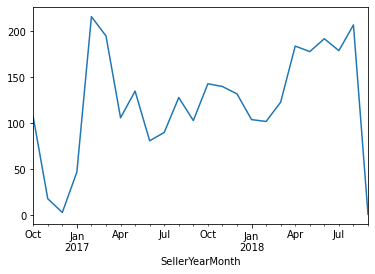

In [ ]:
# No of new seller overtime
seller_overtime[seller_overtime['SellerType'] == 'New'].groupby('SellerYearMonth')['seller_id'].nunique().plot()

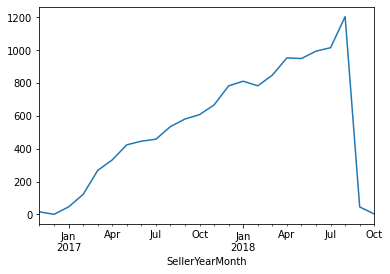

In [ ]:
#no of existing seller overtime
seller_overtime[seller_overtime['SellerType'] == 'Existing'].groupby('SellerYearMonth')['seller_id'].nunique().plot()

In [ ]:
seller_overtime['order_delivered_customer_date'].max()

Timestamp('2018-10-17 13:22:46')

In [ ]:
seller_type_overtime = seller_overtime[seller_overtime['order_delivered_customer_date'] < '2018/09/01']
seller_type_overtime = seller_type_overtime.groupby(['SellerYearMonth', 'SellerType'])['seller_id'].count().reset_index()
seller_type_overtime

,SellerYearMonth,SellerType,seller_id
0,2016-10,New,249
1,2016-11,Existing,48
2,2016-11,New,35
3,2016-12,Existing,1
4,2016-12,New,3
5,2017-01,Existing,210
6,2017-01,New,131
7,2017-02,Existing,943
8,2017-02,New,679
9,2017-03,Existing,2316


In [ ]:
seller_type_overtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype    
---  ------           --------------  -----    
 0   SellerYearMonth  45 non-null     period[M]
 1   SellerType       45 non-null     object   
 2   seller_id        45 non-null     int64    
dtypes: int64(1), object(1), period[M](1)
memory usage: 1.2+ KB


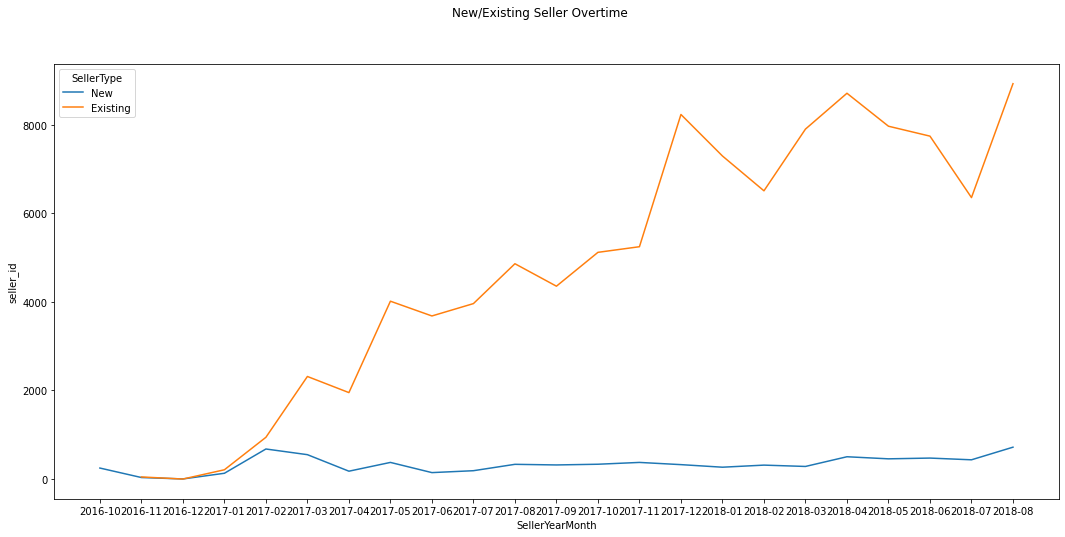

In [ ]:
seller_type_overtime['SellerYearMonth'] = seller_type_overtime['SellerYearMonth'].astype(str)
plt.figure(figsize=(18,8))
plt.suptitle('New/Existing Seller Overtime')

sns.lineplot(data=seller_type_overtime, x='SellerYearMonth', y='seller_id', hue='SellerType')

plt.show()

In [ ]:
new_seller_overtime = seller_overtime[seller_overtime['SellerType'] == 'New'].groupby('SellerYearMonth')['seller_id'].nunique()

In [ ]:
existing_seller_overtime = seller_overtime[seller_overtime['SellerType'] == 'Existing'].groupby('SellerYearMonth')['seller_id'].nunique()

In [ ]:
new_seller_overtime / existing_seller_overtime

SellerYearMonth
2016-10         NaN
2016-11    1.125000
2016-12    3.000000
2017-01    1.021739
2017-02    1.770492
2017-03    0.727612
2017-04    0.319277
2017-05    0.318396
2017-06    0.181614
2017-07    0.196507
2017-08    0.239252
2017-09    0.177281
2017-10    0.235197
2017-11    0.209895
2017-12    0.168582
2018-01    0.128237
2018-02    0.130268
2018-03    0.145047
2018-04    0.193075
2018-05    0.187566
2018-06    0.193159
2018-07    0.176355
2018-08    0.171927
2018-09    0.021739
2018-10         NaN
Freq: M, Name: seller_id, dtype: float64

In [ ]:
seller_ratio = new_seller_overtime / existing_seller_overtime

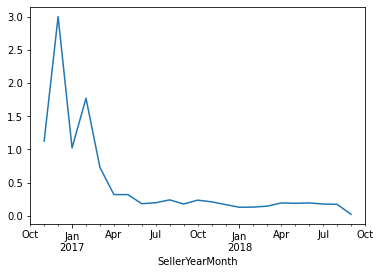

In [ ]:
#seller_ratio
seller_ratio.plot()

In [ ]:
no_of_seller_overtime = seller_overtime[(seller_overtime['order_delivered_customer_date'] > '2016/12/31') & (seller_overtime['order_delivered_customer_date'] < '2018/09/01')].reset_index(drop=True)
no_of_seller_overtime

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth,MinSellerYearMonth,SellerType
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05,94451,viamao,RS,e40a00338817a7127bfbf45220c30e8c,4.0,1.0,credit_card,3.0,45.69,dc83fe8f72fb4388f079a2f9b586240c,8599,itaquaquecetuba,SP,2017-05,2017-03,Existing
1,health_beauty,20daef67faad9f39084ec8812b1dc6b4,59.0,1868.0,3.0,100.0,25.0,2.0,15.0,5b10bae6d8bb45da2e1bb606f76b5032,1,94144541854e298c2d976cb893b81343,2017-09-18 04:15:22,40.90,14.10,098afef7287e209fa5ab0fcd6981a45d,delivered,2017-09-08 09:08:16,2017-09-12 04:15:22,2017-09-19 19:02:22,2017-09-25 21:21:42,2017-09-28,94451,viamao,RS,a40819de2320b2d7581ea54151120b03,5.0,1.0,boleto,1.0,55.00,2fa56046de7e875be1cac671574efe87,81570,curitiba,PR,2017-09,2017-03,Existing
2,health_beauty,20daef67faad9f39084ec8812b1dc6b4,59.0,1868.0,3.0,100.0,25.0,2.0,15.0,a61151bf7c6ab99c973aafb3382f4781,1,94144541854e298c2d976cb893b81343,2017-09-18 12:10:18,40.90,54.02,c8e41791508ca5cf1fe0d9d49c75cf31,delivered,2017-09-11 12:00:17,2017-09-12 12:10:18,2017-09-19 18:25:08,2017-09-28 20:21:41,2017-10-17,94451,viamao,RS,0b6258125de318ec363028d208c0c85d,5.0,1.0,credit_card,4.0,94.92,5333c5135b68c47c3722f84cb27676e2,68005,santarem,PA,2017-09,2017-03,Existing
3,health_beauty,20daef67faad9f39084ec8812b1dc6b4,59.0,1868.0,3.0,100.0,25.0,2.0,15.0,d446c3b58885af902aa7182d140afd0f,1,94144541854e298c2d976cb893b81343,2017-08-03 08:43:43,40.90,8.11,c194b82916f0a767cbc1195072f8d623,delivered,2017-07-26 22:06:40,2017-07-28 08:43:43,2017-07-28 16:44:13,2017-08-01 19:04:06,2017-08-08,94451,viamao,RS,273edc399eb5c0b55fdf20496cab4ea4,5.0,1.0,boleto,1.0,49.01,d5e80f71b6ba2f1d293149b88c70a4ab,92990,eldorado do sul,RS,2017-08,2017-03,Existing
4,health_beauty,14449f70527389068db24e234b28a37d,58.0,2076.0,4.0,300.0,20.0,2.0,25.0,a4fcc7fbe8b6b02b25175965c44780ef,1,94144541854e298c2d976cb893b81343,2017-03-29 15:30:13,34.99,14.52,24f35142319f5e6de65cf5cd4220dfcc,delivered,2017-03-23 15:22:05,2017-03-23 15:32:19,2017-03-28 14:17:45,2017-03-30 15:42:33,2017-04-13,94451,viamao,RS,28ab16a91db615b550705f3652819ea5,5.0,1.0,credit_card,1.0,49.51,19ca668a73743cde5a961ca9987b83ae,83327,pinhais,PR,2017-03,2017-03,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113673,diapers_and_hygiene,53e695484b71a194bf7d89b48700756a,54.0,560.0,4.0,5100.0,32.0,19.0,29.0,796033ffde6ba06e0abe387e36ee8fe0,1,e8ff5a6ceb895583033fc2a0f314e3c2,2018-08-30 14:25:15,139.89,19.08,62d3c457010afc957d955568318e6d78,delivered,2018-08-26 14:17:08,2018-08-26 14:25:15,2018-08-27 07:45:00,2018-08-29 18:48:44,2018-09-11,89063,blumenau,SC,cc474119f93e7eeaa5ba4019c1decdf9,5.0,1.0,credit_card,3.0,158.97,7e3b6916cdc9629811177f17f7ab07ce,3118,sao paulo,SP,2018-08,2018-08,New
113674,pc_gamer,6727051471a0fc4a0e7737b57bff2549,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,1d7542bb5262913fe0516f7943b69a58,1,1961c3e1272bfeceb05d0b78b5bbfdaf,2018-08-01 23:45:09,219.00,9.69,a7bf5e6fa311950360efc620e590fa74,delivered,2018-07-28 23:32:46,2018-07-28 23:45:09,2018-07-30 11:33:00,2018-07-31 19:06:21,2018-08-02,7241,guarulhos,SP,fb392fc072c4

In [ ]:
no_of_seller_overtime = no_of_seller_overtime.groupby(['SellerYearMonth','seller_id'])['order_item_id'].count().reset_index().groupby('SellerYearMonth')['seller_id'].count()

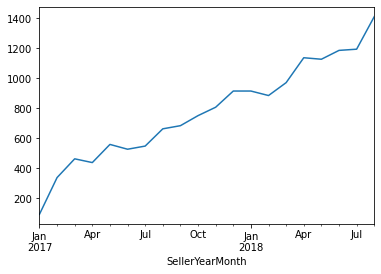

In [ ]:
no_of_seller_overtime.plot()

In [ ]:
sales_overtime = seller_overtime[(seller_overtime['order_delivered_customer_date'] > '2016/12/31') & (seller_overtime['order_delivered_customer_date'] < '2018/09/01')].reset_index(drop=True)

In [ ]:
sales_overtime = sales_overtime.groupby('SellerYearMonth')['price'].sum().reset_index()

In [ ]:
sales_overtime

,SellerYearMonth,price
0,2017-01,36805.01
1,2017-02,200724.78
2,2017-03,354904.47
3,2017-04,275725.15
4,2017-05,545628.80
5,2017-06,455661.54
6,2017-07,479571.74
7,2017-08,569207.18
8,2017-09,609389.56
9,2017-10,677830.03


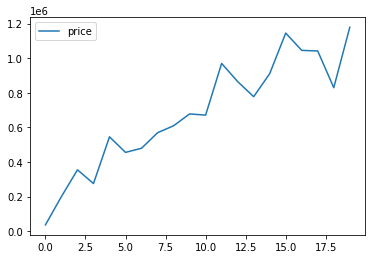

In [ ]:
sales_overtime.plot()

## Analyze Total Price and No of Sellers

In [ ]:
final_products_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114084 entries, 0 to 116598
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   category                       114084 non-null  object        
 1   product_id                     114084 non-null  object        
 2   product_name_lenght            114084 non-null  float64       
 3   product_description_lenght     114084 non-null  float64       
 4   product_photos_qty             114084 non-null  float64       
 5   product_weight_g               114084 non-null  float64       
 6   product_length_cm              114084 non-null  float64       
 7   product_height_cm              114084 non-null  float64       
 8   product_width_cm               114084 non-null  float64       
 9   order_id                       114084 non-null  object        
 10  order_item_id                  114084 non-null  int64         
 11  

In [ ]:
price = final_products_sellers.groupby('category')['price'].sum().reset_index()
price = price.sort_values(by='price', ascending=False)
price

,category,price
43,health_beauty,1275776.49
72,watches_gifts,1214620.45
7,bed_bath_table,1092461.20
67,sports_leisure,995980.76
15,computers_accessories,926557.43
...,...,...
35,flowers,1110.04
46,home_comfort_2,773.17
11,cds_dvds_musicals,730.00
29,fashion_childrens_clothes,519.95


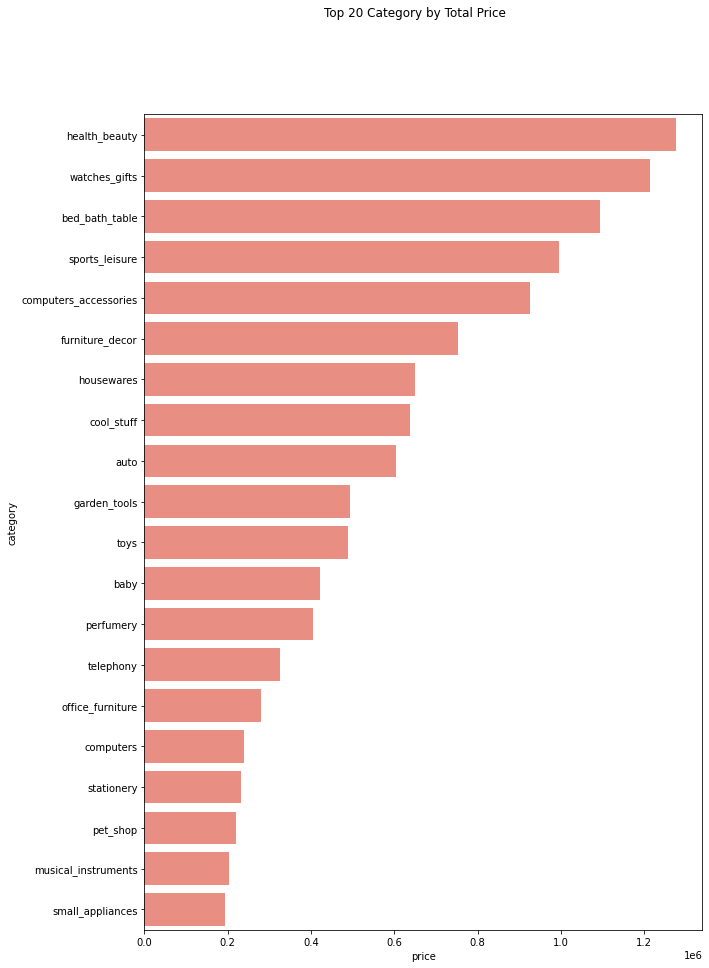

In [ ]:
#top 10 category by revenue (exclude shipping fee)
plt.figure(figsize=(10,15))
plt.suptitle('Top 20 Category by Total Price')

sns.barplot(data=price.head(20), y='category', x='price', color='salmon')
# plt.axhline(y=revenue['revenue'].mean())
plt.show()

In [ ]:
final_products_sellers.groupby('seller_id')['category'].value_counts()

seller_id                         category                       
0015a82c2db000af6aaaf3ae2ecb0532  small_appliances                     3
001cca7ae9ae17fb1caed9dfb1094831  garden_tools                       209
                                  construction_tools_construction     27
002100f778ceb8431b7a1020ff7ab48f  furniture_decor                     58
004c9cd9d87a3c30c522c48c4fc07416  bed_bath_table                     167
                                                                    ... 
fffd5413c0700ac820c7069d66d98c89  furniture_decor                     11
                                  furniture_living_room                1
ffff564a4f9085cd26170f4732393726  auto                                 5
                                  electronics                          2
                                  market_place                         1
Name: category, Length: 6151, dtype: int64

In [ ]:
category_sellers = final_products_sellers.groupby(['category','seller_id'])['order_id'].count().reset_index().groupby('category')['seller_id'].count().reset_index().sort_values(by='seller_id', ascending=False).reset_index()
category_sellers.drop('index',axis=1,inplace=True)
category_sellers

,category,seller_id
0,health_beauty,479
1,sports_leisure,466
2,housewares,452
3,auto,371
4,furniture_decor,352
...,...,...
68,fashion_childrens_clothes,3
69,la_cuisine,2
70,pc_gamer,2
71,security_and_services,2


In [ ]:
final_products_sellers

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05,94451,viamao,RS,e40a00338817a7127bfbf45220c30e8c,4.0,1.0,credit_card,3.0,45.69,dc83fe8f72fb4388f079a2f9b586240c,8599,itaquaquecetuba,SP,2017-05
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-03-07 22:38:47,2018-03-14 14:38:53,2018-04-12,78020,cuiaba,MT,77bb6629f429afe0121776a1bba4f65f,5.0,1.0,credit_card,6.0,123.12,ba0a84d4272f023846c748fd2eb76ffd,20261,rio de janeiro,RJ,2018-03
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-02 17:49:51,2017-08-10 20:04:29,2017-08-30,78020,cuiaba,MT,f3d50350bb91071856a1aa302d58c32d,4.0,1.0,credit_card,4.0,128.08,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,39401,montes claros,MG,2017-08
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-02-08 23:08:10,2018-02-21 14:35:19,2018-03-16,18683,lencois paulista,SP,b5425a02e3804ec8cb2ef00f95cc501c,5.0,1.0,credit_card,2.0,46.01,8ad15fb1cf056731335e36eb723c0eac,98780,santa rosa,RS,2018-02
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-12 13:35:14,2018-08-13 17:57:00,2018-08-21 21:16:33,2018-09-12,86050,londrina,PR,d922c55fb82c5a62ceb8964747620fa5,5.0,1.0,credit_card,4.0,84.54,463b274f7ab4cac3b894531a03a7afa1,97105,santa maria,RS,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116594,kitchen_portables_and_food_preparators,c7a3f1a7f9eef146cc499368b578b884,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,a653bb2e2418fd13d746e3639879aa83,1,ba90964cff9b9e0e6f32b23b82465f7b,2018-05-15 10:54:54,979.00,49.30,404e9aa29dd2f4f68be287245f0e1e50,delivered,2018-05-09 10:34:53,2018-05-09 10:54:54,2018-05-09 11:58:00,2018-05-28 13:51:17,2018-06-12,7140,guarulhos,SP,30592db4d4b8e6ad84a5663103847af7,5.0,1.0,credit_card,1.0,1028.30,81a79f384f8602573644b70698bab3b1,67143,ananindeua,PA,2018-05
116595,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,53fa17c349c4b3dcbbadd8aad2eb559b,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,21.52,23.30,de4347cfed448a35884a19949bc53087,delivered,2018-07-27 13:09:23,2018-07-27 13:43:56,2018-07-27 17:58:00,2018-08-09 13:44:54,2018-08-21,11015,santos,SP,b42930fa8858cb96c2a2721f08ed3348,3.0,1.0,debit_card

In [ ]:
sellers_price = pd.merge(price, category_sellers, on='category', how='inner')
#data for visualization number of sellers and price per Category
sellers_price

,category,price,seller_id
0,health_beauty,1275776.49,479
1,watches_gifts,1214620.45,95
2,bed_bath_table,1092461.20,189
3,sports_leisure,995980.76,466
4,computers_accessories,926557.43,279
...,...,...,...
68,flowers,1110.04,3
69,home_comfort_2,773.17,4
70,cds_dvds_musicals,730.00,1
71,fashion_childrens_clothes,519.95,3


In [ ]:
sellers_price['seller_id'].sum()

6151

In [ ]:
final_products_sellers

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.90,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-12 11:05:13,2017-05-16 09:14:33,2017-05-19 14:13:02,2017-06-05,94451,viamao,RS,e40a00338817a7127bfbf45220c30e8c,4.0,1.0,credit_card,3.0,45.69,dc83fe8f72fb4388f079a2f9b586240c,8599,itaquaquecetuba,SP,2017-05
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.90,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-06 18:30:16,2018-03-07 22:38:47,2018-03-14 14:38:53,2018-04-12,78020,cuiaba,MT,77bb6629f429afe0121776a1bba4f65f,5.0,1.0,credit_card,6.0,123.12,ba0a84d4272f023846c748fd2eb76ffd,20261,rio de janeiro,RJ,2018-03
2,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.90,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-07-31 19:03:15,2017-08-02 17:49:51,2017-08-10 20:04:29,2017-08-30,78020,cuiaba,MT,f3d50350bb91071856a1aa302d58c32d,4.0,1.0,credit_card,4.0,128.08,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,39401,montes claros,MG,2017-08
3,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.90,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-08 14:40:26,2018-02-08 23:08:10,2018-02-21 14:35:19,2018-03-16,18683,lencois paulista,SP,b5425a02e3804ec8cb2ef00f95cc501c,5.0,1.0,credit_card,2.0,46.01,8ad15fb1cf056731335e36eb723c0eac,98780,santa rosa,RS,2018-02
4,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.90,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-12 13:35:14,2018-08-13 17:57:00,2018-08-21 21:16:33,2018-09-12,86050,londrina,PR,d922c55fb82c5a62ceb8964747620fa5,5.0,1.0,credit_card,4.0,84.54,463b274f7ab4cac3b894531a03a7afa1,97105,santa maria,RS,2018-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116594,kitchen_portables_and_food_preparators,c7a3f1a7f9eef146cc499368b578b884,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,a653bb2e2418fd13d746e3639879aa83,1,ba90964cff9b9e0e6f32b23b82465f7b,2018-05-15 10:54:54,979.00,49.30,404e9aa29dd2f4f68be287245f0e1e50,delivered,2018-05-09 10:34:53,2018-05-09 10:54:54,2018-05-09 11:58:00,2018-05-28 13:51:17,2018-06-12,7140,guarulhos,SP,30592db4d4b8e6ad84a5663103847af7,5.0,1.0,credit_card,1.0,1028.30,81a79f384f8602573644b70698bab3b1,67143,ananindeua,PA,2018-05
116595,kitchen_portables_and_food_preparators,7afdd65f79f63819ff5bee328843fa37,48.0,305.0,1.0,750.0,20.0,20.0,20.0,53fa17c349c4b3dcbbadd8aad2eb559b,1,ed8cb7b190ceb6067227478e48cf8dde,2018-08-02 13:30:55,21.52,23.30,de4347cfed448a35884a19949bc53087,delivered,2018-07-27 13:09:23,2018-07-27 13:43:56,2018-07-27 17:58:00,2018-08-09 13:44:54,2018-08-21,11015,santos,SP,b42930fa8858cb96c2a2721f08ed3348,3.0,1.0,debit_card

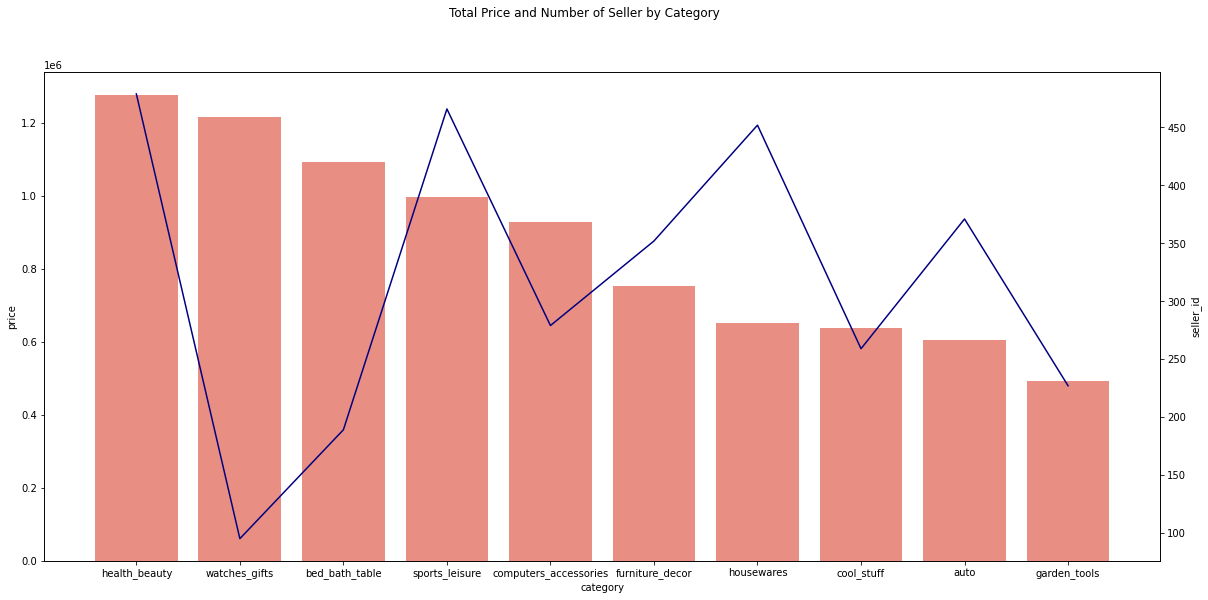

In [ ]:
plt.figure(figsize=(20,9))
plt.suptitle('Total Price and Number of Seller by Category')

sns.barplot(data=sellers_price.head(10), x='category', y='price', color='salmon')

plt.twinx()

sns.lineplot(data=sellers_price.head(10), x='category', y='seller_id', color='navy')

plt.show()

In [ ]:
# plt.figure(figsize=(20,9))
# plt.suptitle('Total Price and Number of Seller by Category')

# sns.barplot(data=price_sellers.tail(10), x='category', y='seller_id', color='salmon')

# plt.twinx()

# sns.lineplot(data=price_sellers.tail(10), x='category', y='price', color='navy')

# plt.show()

Dựa vào biểu đồ trên, ta có thể thấy ngành hàng watches_gifts và bed_bath_table có tổng giá trị sản phẩm cao nhưng số lượng người bán khá thấp so với nhóm hàng còn lại. Ta sẽ tiếp tục đi sâu vào phân tích 2 ngành hàng này và tim kiếm thêm những đặc điểm nổi bật.

In [ ]:
final_products_sellers[final_products_sellers['category'] == 'la_cuisine']

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
116219,la_cuisine,b52e7c92200ed9874e77bc09b5ed4d40,57.0,232.0,1.0,7600.0,55.0,15.0,55.0,30b0ea32347476f4b427daf62e09a5bb,1,c731d18cea9bf687ffee82a241c25b11,2017-08-17 19:30:17,174.00,39.06,9d9cfbce48737214f23bf294daf3c6f7,delivered,2017-08-12 19:20:39,2017-08-12 19:30:17,2017-08-14 18:26:28,2017-08-17 18:28:10,2017-09-05,89701,concordia,SC,fdbbec4b750e768ac12c054acd906d1d,5.0,1.0,credit_card,5.0,213.06,6c861f46d09c560422f6ba6b33c017fe,9371,maua,SP,2017-08
116220,la_cuisine,724c49c346d2979339d366fa59ce49de,33.0,532.0,1.0,3600.0,30.0,30.0,30.0,c72888e51a36defb7b5d49201fcbccf7,1,3078096983cf766a32a06257648502d1,2017-07-17 10:55:14,119.99,27.16,c3cd86c3cbac654f8558a8286ba93c1c,delivered,2017-07-11 10:45:57,2017-07-11 10:55:14,2017-07-11 19:14:48,2017-07-19 17:27:43,2017-08-04,13720,scao jose do rio pardo,SP,80d6f91212fb5216bfc90feddee75581,5.0,1.0,credit_card,1.0,47.15,d8b80a0bd7560fab10e804f36d99fe33,90220,porto alegre,RS,2017-07
116221,la_cuisine,724c49c346d2979339d366fa59ce49de,33.0,532.0,1.0,3600.0,30.0,30.0,30.0,c72888e51a36defb7b5d49201fcbccf7,1,3078096983cf766a32a06257648502d1,2017-07-17 10:55:14,119.99,27.16,c3cd86c3cbac654f8558a8286ba93c1c,delivered,2017-07-11 10:45:57,2017-07-11 10:55:14,2017-07-11 19:14:48,2017-07-19 17:27:43,2017-08-04,13720,scao jose do rio pardo,SP,80d6f91212fb5216bfc90feddee75581,5.0,2.0,voucher,1.0,100.00,d8b80a0bd7560fab10e804f36d99fe33,90220,porto alegre,RS,2017-07
116222,la_cuisine,d29534bc8c74cd3d91e0f175a5c9b366,59.0,748.0,1.0,1450.0,74.0,12.0,15.0,8f95199a6809023bbfabcd9759bd04a1,1,c731d18cea9bf687ffee82a241c25b11,2017-12-05 18:12:31,137.00,0.11,49f554f189c9d30e865dbcd58efafee2,delivered,2017-11-29 16:42:28,2017-11-29 18:12:31,2017-11-30 16:39:11,2017-12-13 19:36:24,2017-12-26,89701,concordia,SC,NaN,NaN,1.0,credit_card,6.0,299.54,5c309a04ba98c8099726ca9297f40e13,74815,goiania,GO,2017-12
116223,la_cuisine,d29534bc8c74cd3d91e0f175a5c9b366,59.0,748.0,1.0,1450.0,74.0,12.0,15.0,f92d5bedc0cb67f0b4fb723b39af6a46,1,c731d18cea9bf687ffee82a241c25b11,2017-10-06 08:35:11,137.00,23.83,3505b6b5d1e198e50fcae66089393ffd,delivered,2017-10-02 08:24:12,2017-10-02 08:35:11,2017-10-02 18:25:43,2017-10-07 00:03:49,2017-10-30,89701,concordia,SC,f9a5034852e397e4c445480576c015b4,5.0,1.0,credit_card,10.0,160.83,52fc783c029911295155492353866f9a,31050,belo horizonte,MG,2017-10
116224,la_cuisine,775596b5ab8f1cb5890c7263c1c92bc4,59.0,731.0,1.0,2200.0,84.0,12.0,15.0,e22a3e8048469ea68906f666d446c25c,1,c731d18cea9bf687ffee82a241c25b11,2017-09-01 10:05:04,139.00,21.46,aa0533eb31ed3be79086f11bb2bec430,delivered,2017-08-28 09:48:01,2017-08-28 10:05:04,2017-08-29 11:05:28,2017-09-05 21:42:35,2017-09-19,89701,concordia,SC,f8c39654aa2349dfb94f274ccefe7c80,5.0,1.0,credit_card,3.0,160.46,a490d5875edefe9bb8f5101ec2f6b56f,13870,sao joao da boa vista,SP,2017-09
116225,la_cuisine,0c800efe70e04ffcc3b266946e3e4826,59.0,284.0,2.0,12500.0,83.0,21.0,43.0,937592924b66482b823ee7ecd185d0ff,1,c731d18cea9bf687ffee82a241c25b11,2018-04-05 19:55:18,389.00,37.70,0fbd856ba1d4961786fb54bd448eb7fe,delivered,2018-03-31 19:17:43,2018-03-31 19:55:18,2018-04-02 19:10:46,2018-04-06 22:05:04,2018-04-18,89701,concordia,SC,45c02db2f81c1968c58f08d46694213d,4.0,1.0,credit_card,8.0,426.70,96328ac15f58fbb232fe14b182103382,89675,vargem bonita,SC,2018-04
116226,la_cuisine,cc9e875c2df286dbed83efe01191162c,57.0,429.0,1.0,2700.0,85.0,7.0,40.0,1ce0acf125f1bcd636276dd21

In [ ]:
final_products_sellers = final_products_sellers.sort_values(by='order_purchase_timestamp').reset_index(drop=True)

In [ ]:
final_products_sellers 

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,1,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,81810,curitiba,PR,6916ca4502d6d3bfd39818759d55d536,1.0,1.0,credit_card,1.0,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,2016-11
1,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,2,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,81810,curitiba,PR,6916ca4502d6d3bfd39818759d55d536,1.0,1.0,credit_card,1.0,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,2016-11
2,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,3,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,81810,curitiba,PR,6916ca4502d6d3bfd39818759d55d536,1.0,1.0,credit_card,1.0,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,2016-11
3,watches_gifts,3ae08df6bcbfe23586dd431c40bddbb7,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,3b697a20d9e427646d92567910af6d57,1,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,85801,cascavel,PR,9fe0f66724df77fd63fcc0c94a323978,4.0,1.0,boleto,1.0,45.46,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,2016-10
4,sports_leisure,fd7fd78fd3cbc1b0a6370a7909c0a629,39.0,518.0,1.0,400.0,16.0,16.0,16.0,be5bc2f0da14d8071e2d45451ad119d9,1,f09b760d23495ac9a7e00d29b769007c,2016-10-21 16:33:46,21.90,17.19,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,15802,catanduva,SP,dc62f1e20d7f280e54066b6a92841086,4.0,1.0,boleto,1.0,39.09,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,2016-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114079,kitchen_dining_laundry_garden_furniture,2b4472df15512a2825ae86fd9ae79335,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,0b223d92c27432930dfe407c6aea3041,2,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,82400,curitiba,PR,6c50d16eb583d5db7e841b77e89b7045,5.0,1.0,credit_card,8.0,510.96,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,2018-08
114080,kitchen_dining_laundry_garden_furniture,2b4472df15512a2825ae86fd9ae79335,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,0b223d92c27432930dfe407c6aea3041,1,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,82400,curitiba,PR,6c50d16eb583d5db7e841b77e89b7045,5.0,1.0,credit_card,

## Percentage Change in Top 10 Product's Values

In [ ]:
top10_cate = list(sellers_price.head(10)['category'])

In [ ]:
final_products_sellers['order_delivered_customer_date'].max()

Timestamp('2018-10-17 13:22:46')

In [ ]:
top10_cate_overtime = final_products_sellers[final_products_sellers['category'].isin(top10_cate) & (final_products_sellers['order_delivered_customer_date'] > '2016/12/31') & (final_products_sellers['order_delivered_customer_date'] < '2018/09/01')].reset_index(drop=True)
top10_cate_overtime

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,auto,6c04a068e5ab37749c980c42a036b9e3,52.0,1367.0,1.0,200.0,16.0,2.0,11.0,b95a0a8bd30aece4e94e81f0591249d8,1,48efc9d94a9834137efd9ea76b065a38,2017-01-09 12:01:20,10.90,8.72,ff3c6d35b4927c9b965aa6a68dcf56e4,delivered,2017-01-05 12:01:20,2017-01-07 03:35:37,2017-01-11 16:22:53,2017-01-17 15:38:58,2017-02-13,81130,curitiba,PR,4e9bc73d2795d85dc2e8b7dbb99e304c,5.0,1.0,boleto,1.0,19.62,83e7958a94bd7f74a9414d8782f87628,80030,curitiba,PR,2017-01
1,auto,6c04a068e5ab37749c980c42a036b9e3,52.0,1367.0,1.0,200.0,16.0,2.0,11.0,d82cef48824870df9946d57e827ed727,1,48efc9d94a9834137efd9ea76b065a38,2017-01-09 14:33:39,10.90,8.72,500bbe66867d0f0bdb3531af1e052b4b,delivered,2017-01-05 14:33:39,2017-01-07 03:44:20,2017-01-11 16:09:06,2017-01-16 16:44:55,2017-02-13,81130,curitiba,PR,24f29af7e0160915b63db804ec27d87b,5.0,1.0,boleto,1.0,19.62,f7be9bec658c62ab6240b44cd26c0b84,80030,curitiba,PR,2017-01
2,garden_tools,b931645cdc2d9868f01544e8db63f5ab,59.0,398.0,6.0,4200.0,50.0,28.0,28.0,f2dd5f15184c73c0d45c02941c7c23d1,1,b14db04aa7881970e83ffa9426897925,2017-01-09 22:52:33,65.00,26.92,4b60b3ade055c6ad88a00758c8e8a162,delivered,2017-01-05 22:52:33,2017-01-05 23:05:27,2017-01-06 16:08:45,2017-01-13 17:06:48,2017-02-23,18048,sorocaba,SP,524b32c45c6e03c198984e38522f559f,3.0,1.0,credit_card,1.0,91.92,b88b78a413e70182e18b032361b24f91,44900,irece,BA,2017-01
3,health_beauty,b68cf84ede4fd1e14b1740de5b727d55,47.0,1319.0,2.0,638.0,26.0,13.0,22.0,1b3d11cf9f92c0f7baf627ab059621f8,1,e24fc9fcd865784fb25705606fe3dfe7,2017-01-10 23:31:23,636.00,30.71,85ed641fe825f188f1a67b317b5f540c,delivered,2017-01-06 23:31:23,2017-01-06 23:44:08,2017-01-09 09:33:56,2017-01-17 17:27:49,2017-02-16,12913,braganca paulista,SP,5b3e6a4905490b42830a938b0943ee88,5.0,1.0,credit_card,1.0,16.71,318b69202a96429368680f215843340d,59129,natal,RN,2017-01
4,health_beauty,b68cf84ede4fd1e14b1740de5b727d55,47.0,1319.0,2.0,638.0,26.0,13.0,22.0,1b3d11cf9f92c0f7baf627ab059621f8,1,e24fc9fcd865784fb25705606fe3dfe7,2017-01-10 23:31:23,636.00,30.71,85ed641fe825f188f1a67b317b5f540c,delivered,2017-01-06 23:31:23,2017-01-06 23:44:08,2017-01-09 09:33:56,2017-01-17 17:27:49,2017-02-16,12913,braganca paulista,SP,5b3e6a4905490b42830a938b0943ee88,5.0,3.0,voucher,1.0,200.00,318b69202a96429368680f215843340d,59129,natal,RN,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72746,watches_gifts,b6b76b074ed0d77d0f3443b12d8adb5e,46.0,531.0,6.0,300.0,16.0,2.0,20.0,fb393211459aac00af932cd7ab4fa2cc,1,6560211a19b47992c3666cc44a7e94c0,2018-08-31 09:25:12,99.00,7.95,54365416b7ef5599f54a6c7821d5d290,delivered,2018-08-29 09:14:11,2018-08-29 09:25:12,2018-08-29 15:48:00,2018-08-30 13:03:28,2018-09-04,5849,sao paulo,SP,a6b04aa8f3c756a9b4a31e59928b47fe,1.0,1.0,credit_card,1.0,106.95,b4dcade04bc548b7e3b0243c801f8c26,13184,hortolandia,SP,2018-08
72747,watches_gifts,9865c67a74684715521d1e70226cce0b,52.0,629.0,1.0,290.0,19.0,13.0,13.0,912859fef5a0bd5059b6d48fa79d121a,1,fa1c13f2614d7b5c4749cbc52fecda94,2018-09-03 10:04:16,169.80,8.45,b8c19e70d00f6927388e4f31c923d785,delivered,2018-08-29 09:48:09,2018-08-29 10:04:16,2018-08-29 19:01:00,2018-08-30 23:28:52,2018-09-04,13170,sumare,SP,728cca2fecca64b4f4cbf212bdc87319,5.0,1.0,credit_card,1.0,178.25,0c6d7218d5f3fa14514fd29865269993,9625,sao bernardo do campo,SP,2018-08
72748,sports_leisure,9a8

In [ ]:
pct_top10_cate = top10_cate_overtime.groupby(['SellerYearMonth', 'category'])['price'].sum().reset_index()
pct_top10_cate

,SellerYearMonth,category,price
0,2017-01,auto,2494.67
1,2017-01,bed_bath_table,725.60
2,2017-01,computers_accessories,464.29
3,2017-01,cool_stuff,2181.49
4,2017-01,furniture_decor,6075.42
...,...,...,...
195,2018-08,garden_tools,23934.85
196,2018-08,health_beauty,160501.74
197,2018-08,housewares,85768.10
198,2018-08,sports_leisure,65318.17


In [ ]:
pct_top10_cate['price'].pct_change()

0           NaN
1     -0.709140
2     -0.360130
3      3.698550
4      1.784986
         ...   
195   -0.608035
196    5.705776
197   -0.465625
198   -0.238433
199    0.614373
Name: price, Length: 200, dtype: float64

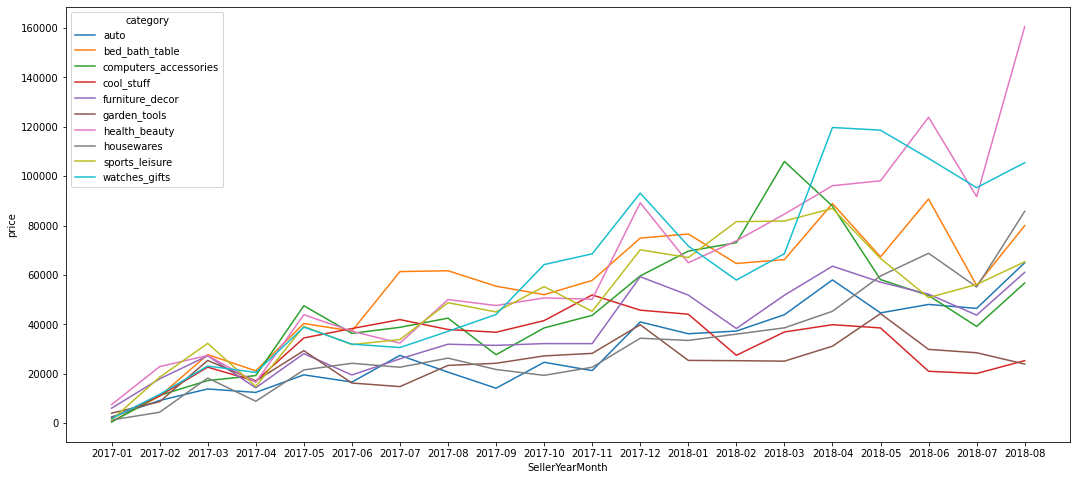

In [ ]:
#highlights watches gifts
pct_top10_cate['SellerYearMonth'] = pct_top10_cate['SellerYearMonth'].astype(str)
plt.figure(figsize=(18,8))

sns.lineplot(data=pct_top10_cate, x='SellerYearMonth', y='price', hue='category')

plt.show()
#appendix

## Olist Sales Overtime

In [ ]:
final_products_sellers

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,1,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,81810,curitiba,PR,6916ca4502d6d3bfd39818759d55d536,1.0,1.0,credit_card,1.0,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,2016-11
1,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,2,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,81810,curitiba,PR,6916ca4502d6d3bfd39818759d55d536,1.0,1.0,credit_card,1.0,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,2016-11
2,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,3,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,81810,curitiba,PR,6916ca4502d6d3bfd39818759d55d536,1.0,1.0,credit_card,1.0,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,2016-11
3,watches_gifts,3ae08df6bcbfe23586dd431c40bddbb7,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,3b697a20d9e427646d92567910af6d57,1,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,85801,cascavel,PR,9fe0f66724df77fd63fcc0c94a323978,4.0,1.0,boleto,1.0,45.46,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,2016-10
4,sports_leisure,fd7fd78fd3cbc1b0a6370a7909c0a629,39.0,518.0,1.0,400.0,16.0,16.0,16.0,be5bc2f0da14d8071e2d45451ad119d9,1,f09b760d23495ac9a7e00d29b769007c,2016-10-21 16:33:46,21.90,17.19,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,15802,catanduva,SP,dc62f1e20d7f280e54066b6a92841086,4.0,1.0,boleto,1.0,39.09,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,2016-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114079,kitchen_dining_laundry_garden_furniture,2b4472df15512a2825ae86fd9ae79335,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,0b223d92c27432930dfe407c6aea3041,2,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,82400,curitiba,PR,6c50d16eb583d5db7e841b77e89b7045,5.0,1.0,credit_card,8.0,510.96,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,2018-08
114080,kitchen_dining_laundry_garden_furniture,2b4472df15512a2825ae86fd9ae79335,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,0b223d92c27432930dfe407c6aea3041,1,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,82400,curitiba,PR,6c50d16eb583d5db7e841b77e89b7045,5.0,1.0,credit_card,

##Analyze No of Orders by Category

In [ ]:
order_category = final_products_sellers['category'].value_counts().reset_index()
order_category.rename(columns={'index':'category', 'category':'Count'}, inplace=True)
order_category

,category,Count
0,bed_bath_table,11814
1,health_beauty,9816
2,sports_leisure,8791
3,furniture_decor,8643
4,computers_accessories,7963
...,...,...
68,cds_dvds_musicals,14
69,kitchen_portables_and_food_preparators,14
70,pc_gamer,9
71,fashion_childrens_clothes,7


In [ ]:
sellers_order = pd.merge(order_category, category_sellers, on='category', how='inner')
#data for visualization number of sellers and price per Category
sellers_order

,category,Count,seller_id
0,bed_bath_table,11814,189
1,health_beauty,9816,479
2,sports_leisure,8791,466
3,furniture_decor,8643,352
4,computers_accessories,7963,279
...,...,...,...
68,cds_dvds_musicals,14,1
69,kitchen_portables_and_food_preparators,14,5
70,pc_gamer,9,2
71,fashion_childrens_clothes,7,3


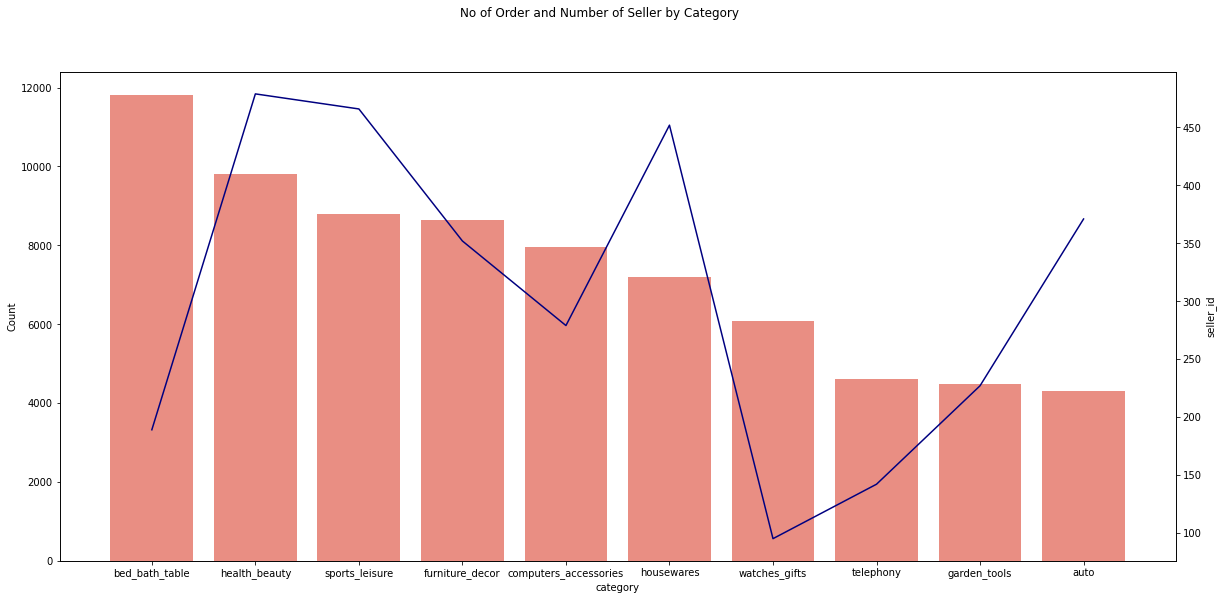

In [ ]:
#top 10 category by orders
plt.figure(figsize=(20,9))
plt.suptitle('No of Order and Number of Seller by Category')

sns.barplot(data=sellers_order.head(10), x='category', y='Count', color='salmon')

plt.twinx()

sns.lineplot(data=sellers_order.head(10), x='category', y='seller_id', color='navy')

plt.show()

## Overview 

In [ ]:
#so luong nganh hang
final_products_sellers['category'].nunique()

73

In [ ]:
#so luong seller tren san 
final_products_sellers['seller_id'].nunique()

2914

In [ ]:
final_products_sellers['order_status'].value_counts()

delivered    114084
Name: order_status, dtype: int64

## Filter data by time

In [ ]:
final_products_sellers['order_purchase_timestamp'].min()

Timestamp('2016-09-15 12:16:38')

In [ ]:
final_products_sellers['order_purchase_timestamp'].max()

Timestamp('2018-08-29 15:00:37')

In [ ]:
(final_products_sellers['order_purchase_timestamp'] > '2016/09/30' )

0         False
1         False
2         False
3          True
4          True
          ...  
114079     True
114080     True
114081     True
114082     True
114083     True
Name: order_purchase_timestamp, Length: 114084, dtype: bool

In [ ]:
(final_products_sellers['order_purchase_timestamp'] < '2018/09/01' )

0         True
1         True
2         True
3         True
4         True
          ... 
114079    True
114080    True
114081    True
114082    True
114083    True
Name: order_purchase_timestamp, Length: 114084, dtype: bool

In [ ]:
total_price_by_time = final_products_sellers[(final_products_sellers['order_delivered_customer_date'] > '2016/09/30' ) & (final_products_sellers['order_delivered_customer_date'] < '2018/09/01' )]

In [ ]:
total_price_by_time['OrderYearMonth'] = final_products_sellers['order_delivered_customer_date'].dt.to_period('M')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
total_price_by_time = total_price_by_time[(total_price_by_time['order_delivered_customer_date'] > '2016/12/31')]

In [ ]:
price_value_by_time = total_price_by_time.groupby('OrderYearMonth')['price'].sum().reset_index()
price_value_by_time

,OrderYearMonth,price
0,2017-01,36805.01
1,2017-02,200724.78
2,2017-03,354904.47
3,2017-04,275725.15
4,2017-05,545628.80
5,2017-06,455661.54
6,2017-07,479571.74
7,2017-08,569207.18
8,2017-09,609389.56
9,2017-10,677830.03


In [ ]:
pct_change = total_price_by_time.groupby('OrderYearMonth')['price'].sum().pct_change().reset_index()
# pct_change.dropna(inplace=True)
pct_change.rename(columns={'price':'percentage_change'}, inplace=True)
pct_change

,OrderYearMonth,percentage_change
0,2017-01,NaN
1,2017-02,4.453735
2,2017-03,0.768115
3,2017-04,-0.223100
4,2017-05,0.978887
5,2017-06,-0.164887
6,2017-07,0.052474
7,2017-08,0.186907
8,2017-09,0.070594
9,2017-10,0.112310


In [ ]:
price_pct_by_time = price_value_by_time.merge(pct_change, on='OrderYearMonth', how='inner')
# price_pct_by_time.fillna(0,inplace=True)
price_pct_by_time

,OrderYearMonth,price,percentage_change
0,2017-01,36805.01,NaN
1,2017-02,200724.78,4.453735
2,2017-03,354904.47,0.768115
3,2017-04,275725.15,-0.223100
4,2017-05,545628.80,0.978887
5,2017-06,455661.54,-0.164887
6,2017-07,479571.74,0.052474
7,2017-08,569207.18,0.186907
8,2017-09,609389.56,0.070594
9,2017-10,677830.03,0.112310


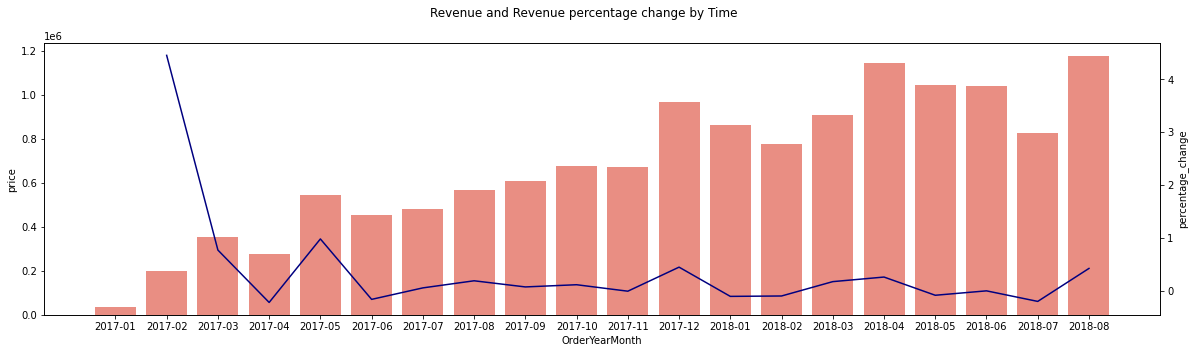

In [ ]:
price_pct_by_time['OrderYearMonth'] = price_pct_by_time['OrderYearMonth'].astype('str')
plt.figure(figsize=(20,5))
plt.suptitle('Revenue and Revenue percentage change by Time')

sns.barplot(data=price_pct_by_time, x='OrderYearMonth', y='price', color='salmon')

plt.twinx()

sns.lineplot(data=price_pct_by_time, x='OrderYearMonth', y='percentage_change', color='navy')

plt.show()

Event in 11/2017: 
* MOTOR GP held at Brazil
* 13TH WORLD CONGRESS OF INTENSIVE AND CRITICAL CARE MEDICINE, RIO DE JANEIRO/ BRAZIL - Đại hội Y tế Thế giới về Chăm sóc và phát triển trí tuệ tổ chức tại Rio De Janeiro, Brazil

In [ ]:
top2_category = final_products_sellers[(final_products_sellers['order_delivered_customer_date'] > '2016/09/30' ) & (final_products_sellers['order_delivered_customer_date'] < '2018/09/01' )]

In [ ]:
top2_category = top2_category[(top2_category['category'] == 'bed_bath_table') | (top2_category['category'] == 'watches_gifts')].reset_index(drop=True)
top2_category['OrderYearMonth'] = top2_category['order_delivered_customer_date'].dt.to_period('M')
top2_category

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth,OrderYearMonth
0,watches_gifts,3ae08df6bcbfe23586dd431c40bddbb7,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,3b697a20d9e427646d92567910af6d57,1,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.9,15.56,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,85801,cascavel,PR,9fe0f66724df77fd63fcc0c94a323978,4.0,1.0,boleto,1.0,45.46,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,2016-10,2016-10
1,bed_bath_table,66e08854f9319c6aa4874ca435598331,54.0,584.0,1.0,1400.0,33.0,8.0,23.0,bcbc0973414b1dd97555e6f8e9713cfa,3,cca3071e3e9bb7d12640c9fbe2301306,2016-10-09 03:45:42,79.9,15.91,3f6f000d5b0a959f38481fad4ab7cac2,delivered,2016-10-04 23:59:01,2016-10-05 03:45:41,2016-10-09 03:45:42,2016-10-16 10:41:50,2016-11-28,14940,ibitinga,SP,98de2ed46bf9a8835089f29126a41a13,5.0,1.0,credit_card,3.0,383.24,221234182f828fb9f2a4ba9c89874ede,87820,cidade gaucha,PR,2016-10,2016-10
2,bed_bath_table,48a12f318432c4b6a1fdfd5d79372e66,54.0,584.0,1.0,1200.0,33.0,8.0,23.0,bcbc0973414b1dd97555e6f8e9713cfa,1,cca3071e3e9bb7d12640c9fbe2301306,2016-10-09 03:45:42,79.9,15.91,3f6f000d5b0a959f38481fad4ab7cac2,delivered,2016-10-04 23:59:01,2016-10-05 03:45:41,2016-10-09 03:45:42,2016-10-16 10:41:50,2016-11-28,14940,ibitinga,SP,98de2ed46bf9a8835089f29126a41a13,5.0,1.0,credit_card,3.0,383.24,221234182f828fb9f2a4ba9c89874ede,87820,cidade gaucha,PR,2016-10,2016-10
3,bed_bath_table,33e0cfd1cd80a0491da068d7a7f93ff8,44.0,501.0,1.0,2400.0,30.0,30.0,30.0,3b2ca3293a7ce539ea2379d704fa37ce,1,dd2bdf855a9172734fbc3744021ae9b9,2016-10-10 15:47:18,169.9,14.97,06a70917afd2dcd59396e1eac836c646,delivered,2016-10-05 12:44:09,2016-10-06 15:47:17,2016-11-17 11:54:02,2016-11-17 19:53:49,2016-11-25,31255,belo horizonte,MG,41deaffcf6deae0e5bda248b70048469,5.0,1.0,credit_card,5.0,184.87,451c36d15ca9729da50f130f5c0f1c59,31870,belo horizonte,MG,2016-11,2016-11
4,watches_gifts,545085671b9f2d7d2e1a9110b15d838c,43.0,1534.0,2.0,413.0,19.0,12.0,15.0,1970f2fb4b83ff962a75b064abc37f4c,1,4d600e08ecbe08258c79e536c5a42fee,2016-10-21 16:32:32,633.0,20.39,45b5b5e9424ca746ad6a3161de453e00,delivered,2016-10-06 07:53:10,2016-10-07 02:47:36,2016-10-21 16:32:32,2016-10-28 10:24:36,2016-11-30,85988,entre rios do oeste,PR,30438651b2a9f883ff03c86129aed070,5.0,1.0,boleto,1.0,653.39,4543480cbf99692641f5b35eeae7947f,13487,limeira,SP,2016-10,2016-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17874,watches_gifts,e06f99e79036d681effa3de75989bf22,54.0,257.0,5.0,200.0,16.0,2.0,20.0,c59712a9767189f0a1e5258b5c3447b0,1,6560211a19b47992c3666cc44a7e94c0,2018-08-30 14:45:12,59.0,7.67,1613194aae75f127dd52a37566c138ca,delivered,2018-08-28 14:37:52,2018-08-28 14:45:12,2018-08-29 15:48:00,2018-08-30 16:21:57,2018-08-31,5849,sao paulo,SP,3900b51580cb6bd59e6ea3f7eacd209c,5.0,1.0,credit_card,1.0,66.67,6e7bfbc2f1b96b9be02a19a233d98e0f,4538,sao paulo,SP,2018-08,2018-08
17875,bed_bath_table,01a5038835acf17f141c7247956b72d6,54.0,235.0,1.0,1350.0,34.0,7.0,32.0,d99a07d049ac5c39f6f62edba8d57721,1,da8622b14eb17ae2831f4ac5b9dab84a,2018-09-04 19:43:57,99.9,11.72,f5fc6bc27d5c599cc9bed0a2eacf030e,delivered,2018-08-28 19:32:31,2018-08-28 19:43:57,2018-08-29 19:02:00,2018-08-30 18:22:46,2018-09-05,13405,piracicaba,SP,77e03457b740aba91fb9512510d4d3be,5.0,1.0,cre

In [ ]:
top2_price = top2_category.groupby(['OrderYearMonth','category'])['price'].sum().reset_index()
top2_price['OrderYearMonth'] = top2_price['OrderYearMonth'].astype('str')
top2_price

,OrderYearMonth,category,price
0,2016-10,bed_bath_table,309.09
1,2016-10,watches_gifts,2711.07
2,2016-11,bed_bath_table,169.90
3,2017-01,bed_bath_table,725.60
4,2017-01,watches_gifts,1824.17
5,2017-02,bed_bath_table,10925.43
6,2017-02,watches_gifts,11666.09
7,2017-03,bed_bath_table,27763.88
8,2017-03,watches_gifts,23132.61
9,2017-04,bed_bath_table,21189.47


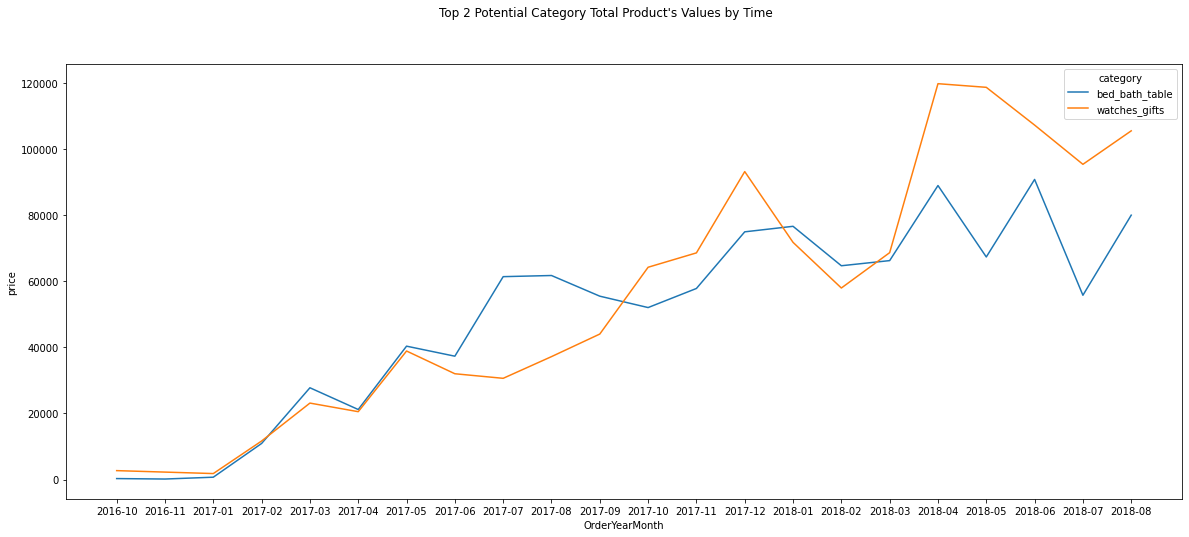

In [ ]:
top2_price['OrderYearMonth'] = top2_price['OrderYearMonth'].astype('str')
plt.figure(figsize=(20,8))
plt.suptitle('Top 2 Potential Category Total Product\'s Values by Time')

sns.lineplot(data=top2_price, x='OrderYearMonth', y='price', hue='category')

plt.show()

# Big Question: What type of product (Category) is potential (high total price, less competitive) for a beginner?

##I: Feature in the 'potential' category


1.   Price Range
2.   Product Feature:
- information: name length, description, photo quantity
- size: length, height, width, weight







### 1. Price range:


In [ ]:
top2_potential = final_products_sellers[(final_products_sellers['category'] == 'bed_bath_table') | (final_products_sellers['category'] == 'watches_gifts')].reset_index(drop=True)
top2_potential.head()

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,watches_gifts,3ae08df6bcbfe23586dd431c40bddbb7,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,3b697a20d9e427646d92567910af6d57,1,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.9,15.56,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,85801,cascavel,PR,9fe0f66724df77fd63fcc0c94a323978,4.0,1.0,boleto,1.0,45.46,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,2016-10
1,bed_bath_table,66e08854f9319c6aa4874ca435598331,54.0,584.0,1.0,1400.0,33.0,8.0,23.0,bcbc0973414b1dd97555e6f8e9713cfa,3,cca3071e3e9bb7d12640c9fbe2301306,2016-10-09 03:45:42,79.9,15.91,3f6f000d5b0a959f38481fad4ab7cac2,delivered,2016-10-04 23:59:01,2016-10-05 03:45:41,2016-10-09 03:45:42,2016-10-16 10:41:50,2016-11-28,14940,ibitinga,SP,98de2ed46bf9a8835089f29126a41a13,5.0,1.0,credit_card,3.0,383.24,221234182f828fb9f2a4ba9c89874ede,87820,cidade gaucha,PR,2016-10
2,bed_bath_table,48a12f318432c4b6a1fdfd5d79372e66,54.0,584.0,1.0,1200.0,33.0,8.0,23.0,bcbc0973414b1dd97555e6f8e9713cfa,1,cca3071e3e9bb7d12640c9fbe2301306,2016-10-09 03:45:42,79.9,15.91,3f6f000d5b0a959f38481fad4ab7cac2,delivered,2016-10-04 23:59:01,2016-10-05 03:45:41,2016-10-09 03:45:42,2016-10-16 10:41:50,2016-11-28,14940,ibitinga,SP,98de2ed46bf9a8835089f29126a41a13,5.0,1.0,credit_card,3.0,383.24,221234182f828fb9f2a4ba9c89874ede,87820,cidade gaucha,PR,2016-10
3,bed_bath_table,33e0cfd1cd80a0491da068d7a7f93ff8,44.0,501.0,1.0,2400.0,30.0,30.0,30.0,3b2ca3293a7ce539ea2379d704fa37ce,1,dd2bdf855a9172734fbc3744021ae9b9,2016-10-10 15:47:18,169.9,14.97,06a70917afd2dcd59396e1eac836c646,delivered,2016-10-05 12:44:09,2016-10-06 15:47:17,2016-11-17 11:54:02,2016-11-17 19:53:49,2016-11-25,31255,belo horizonte,MG,41deaffcf6deae0e5bda248b70048469,5.0,1.0,credit_card,5.0,184.87,451c36d15ca9729da50f130f5c0f1c59,31870,belo horizonte,MG,2016-11
4,watches_gifts,545085671b9f2d7d2e1a9110b15d838c,43.0,1534.0,2.0,413.0,19.0,12.0,15.0,1970f2fb4b83ff962a75b064abc37f4c,1,4d600e08ecbe08258c79e536c5a42fee,2016-10-21 16:32:32,633.0,20.39,45b5b5e9424ca746ad6a3161de453e00,delivered,2016-10-06 07:53:10,2016-10-07 02:47:36,2016-10-21 16:32:32,2016-10-28 10:24:36,2016-11-30,85988,entre rios do oeste,PR,30438651b2a9f883ff03c86129aed070,5.0,1.0,boleto,1.0,653.39,4543480cbf99692641f5b35eeae7947f,13487,limeira,SP,2016-10


Số lượng sản phẩm trên sàn của 2 ngành hàng

In [ ]:
product_english.shape[0]

32340

In [ ]:
#bed_bath_table products
product_english[product_english['product_category_name_english'] == 'bed_bath_table'].shape[0]

3029

In [ ]:
product_english[product_english['product_category_name_english'] == 'bed_bath_table'].shape[0] / product_english.shape[0]

0.09366110080395795

In [ ]:
#watches_gifts products
product_english[product_english['product_category_name_english'] == 'watches_gifts'].shape[0]

1329

In [ ]:
product_english[product_english['product_category_name_english'] == 'watches_gifts'].shape[0] / product_english.shape[0]

0.041094619666048236

Số lượng sản phẩm của bed_bath_table và watches_gifts lần lượt chiếm 9,3% và 4,1% tổng số sản phẩm trên sàn

Số lượng đơn hàng đã bán ra

In [ ]:
top2_potential.groupby(['category'])['order_item_id'].count()

category
bed_bath_table    11814
watches_gifts      6077
Name: order_item_id, dtype: int64

In [ ]:
top2_potential.groupby(['category'])['order_item_id'].sum() / final_products_sellers['order_item_id'].sum()

category
bed_bath_table    0.106890
watches_gifts     0.048925
Name: order_item_id, dtype: float64

Số lượng đơn hàng:

In [ ]:
top2_potential.groupby(['category'])['order_id'].count()

category
bed_bath_table    11814
watches_gifts      6077
Name: order_id, dtype: int64

In [ ]:
top2_potential.groupby(['category'])['order_id'].count() / final_products_sellers.shape[0]

category
bed_bath_table    0.103555
watches_gifts     0.053268
Name: order_id, dtype: float64

Doanh thu:

In [ ]:
top2_potential.groupby(['category'])['price'].sum()

category
bed_bath_table    1092461.20
watches_gifts     1214620.45
Name: price, dtype: float64

bed_bath_table và watches_gifts lần lượt có tổng giá trị chiếm tỉ lệ 7.9% và 8.8% trên tổng giá trị của tất cả ngành hàng

In [ ]:
top2_potential.groupby(['category'])['price'].sum() /final_products_sellers['price'].sum()

category
bed_bath_table    0.079789
watches_gifts     0.088711
Name: price, dtype: float64

Khoảng giá trung bình của mỗi sản phẩm:

In [ ]:
mean_price = top2_potential.groupby(['category','product_id'])['price'].mean().reset_index()
mean_price.head()

,category,product_id,price
0,bed_bath_table,0009406fd7479715e4bef61dd91f2462,229.0
1,bed_bath_table,001b237c0e9bb435f2e54071129237e9,78.9
2,bed_bath_table,001c5d71ac6ad696d22315953758fa04,79.9
3,bed_bath_table,0085dddda27567189f1dfd1eda7c286e,179.8
4,bed_bath_table,008686d56f4c85b987a4c24a286834c1,207.0


In [ ]:
bed_bath_table = final_products_sellers[final_products_sellers['category'] == 'bed_bath_table'].reset_index(drop=True)
bed_bath_table.head()

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,bed_bath_table,66e08854f9319c6aa4874ca435598331,54.0,584.0,1.0,1400.0,33.0,8.0,23.0,bcbc0973414b1dd97555e6f8e9713cfa,3,cca3071e3e9bb7d12640c9fbe2301306,2016-10-09 03:45:42,79.90,15.91,3f6f000d5b0a959f38481fad4ab7cac2,delivered,2016-10-04 23:59:01,2016-10-05 03:45:41,2016-10-09 03:45:42,2016-10-16 10:41:50,2016-11-28,14940,ibitinga,SP,98de2ed46bf9a8835089f29126a41a13,5.0,1.0,credit_card,3.0,383.24,221234182f828fb9f2a4ba9c89874ede,87820,cidade gaucha,PR,2016-10
1,bed_bath_table,48a12f318432c4b6a1fdfd5d79372e66,54.0,584.0,1.0,1200.0,33.0,8.0,23.0,bcbc0973414b1dd97555e6f8e9713cfa,1,cca3071e3e9bb7d12640c9fbe2301306,2016-10-09 03:45:42,79.90,15.91,3f6f000d5b0a959f38481fad4ab7cac2,delivered,2016-10-04 23:59:01,2016-10-05 03:45:41,2016-10-09 03:45:42,2016-10-16 10:41:50,2016-11-28,14940,ibitinga,SP,98de2ed46bf9a8835089f29126a41a13,5.0,1.0,credit_card,3.0,383.24,221234182f828fb9f2a4ba9c89874ede,87820,cidade gaucha,PR,2016-10
2,bed_bath_table,33e0cfd1cd80a0491da068d7a7f93ff8,44.0,501.0,1.0,2400.0,30.0,30.0,30.0,3b2ca3293a7ce539ea2379d704fa37ce,1,dd2bdf855a9172734fbc3744021ae9b9,2016-10-10 15:47:18,169.90,14.97,06a70917afd2dcd59396e1eac836c646,delivered,2016-10-05 12:44:09,2016-10-06 15:47:17,2016-11-17 11:54:02,2016-11-17 19:53:49,2016-11-25,31255,belo horizonte,MG,41deaffcf6deae0e5bda248b70048469,5.0,1.0,credit_card,5.0,184.87,451c36d15ca9729da50f130f5c0f1c59,31870,belo horizonte,MG,2016-11
3,bed_bath_table,33ec1056063990a554e2e2cd85219de5,60.0,624.0,2.0,400.0,57.0,4.0,28.0,f205336be829af209878b6339cf02c7e,1,cca3071e3e9bb7d12640c9fbe2301306,2016-10-21 16:33:59,59.90,14.69,bea482168e59ee99ecadacecb808d058,delivered,2016-10-06 09:59:13,2016-10-06 15:56:43,2016-10-21 11:36:05,2016-10-27 17:55:56,2016-11-30,14940,ibitinga,SP,8ee14babdad4ad45c1188f8a93b58b14,5.0,1.0,credit_card,1.0,74.59,4bb9eff279b892251d672d74a4272434,23075,rio de janeiro,RJ,2016-10
4,bed_bath_table,7721582bb750762d81850267d19881c1,63.0,837.0,1.0,1400.0,43.0,5.0,30.0,6e5fe7366a2e1bfbf3257dba0af1267f,5,0c8380b62e38e8a1e6adbeba7eb9688c,2016-10-14 12:02:21,19.83,17.00,5263febf1413e9a60ceb7b842008b7ef,delivered,2016-10-09 22:36:25,2016-10-10 12:02:19,2016-10-14 12:02:21,2016-10-17 13:02:21,2016-12-06,37410,tres coracoes,MG,3918306fc04f31c393a12070f6e66966,1.0,1.0,credit_card,10.0,406.92,6f90ec5150be36c4475835b5941ab56f,82980,curitiba,PR,2016-10


In [ ]:
watches_gifts = final_products_sellers[final_products_sellers['category'] == 'watches_gifts'].reset_index(drop=True)
watches_gifts.head()

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,watches_gifts,3ae08df6bcbfe23586dd431c40bddbb7,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,3b697a20d9e427646d92567910af6d57,1,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,85801,cascavel,PR,9fe0f66724df77fd63fcc0c94a323978,4.0,1.0,boleto,1.0,45.46,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,2016-10
1,watches_gifts,545085671b9f2d7d2e1a9110b15d838c,43.0,1534.0,2.0,413.0,19.0,12.0,15.0,1970f2fb4b83ff962a75b064abc37f4c,1,4d600e08ecbe08258c79e536c5a42fee,2016-10-21 16:32:32,633.00,20.39,45b5b5e9424ca746ad6a3161de453e00,delivered,2016-10-06 07:53:10,2016-10-07 02:47:36,2016-10-21 16:32:32,2016-10-28 10:24:36,2016-11-30,85988,entre rios do oeste,PR,30438651b2a9f883ff03c86129aed070,5.0,1.0,boleto,1.0,653.39,4543480cbf99692641f5b35eeae7947f,13487,limeira,SP,2016-10
2,watches_gifts,09b590ada623ecf66329917ea4731957,44.0,1396.0,2.0,214.0,17.0,11.0,13.0,1c4cafd25254eee31c8c9b8c141fb10a,1,4d600e08ecbe08258c79e536c5a42fee,2016-10-21 16:38:22,649.17,22.14,b03bfe9da81252f5e3b39196ba3518c0,delivered,2016-10-06 10:12:12,2016-10-06 16:01:15,2016-10-21 16:38:22,2016-10-27 11:43:40,2016-12-06,85988,entre rios do oeste,PR,8abb8dd1b12844a0af1a09b7b270a00b,5.0,1.0,credit_card,4.0,671.31,ac10064713bd3169f17aed85acad2106,71020,brasilia,DF,2016-10
3,watches_gifts,fd8a5b9a8a79d7ba0739d69be5dc5aa1,44.0,394.0,3.0,850.0,17.0,13.0,15.0,bc0e0c28cbe995798d3afb7c7c75d269,1,7e93a43ef30c4f03f38b393420bc753a,2016-10-12 03:19:10,1399.00,24.55,a9dc96b027d1252bbac0a9b72d837fc6,delivered,2016-10-08 01:28:14,2016-10-08 03:19:09,2016-10-14 17:39:46,2016-10-17 18:39:46,2016-12-02,6429,barueri,SP,419ad0bca36f52cf9b91262de3394564,5.0,1.0,credit_card,10.0,1423.55,fdaa290acb9eeacb66fa7f979baa6803,23012,rio de janeiro,RJ,2016-10
4,watches_gifts,368343a35b2e888dae4f3f831d22437a,42.0,748.0,2.0,300.0,16.0,13.0,13.0,9a3e437ab219133c20a7033be9087edf,1,fa1c13f2614d7b5c4749cbc52fecda94,2017-01-11 20:45:31,149.00,15.21,3c03fed2df425b8291c5913c52b51b84,delivered,2017-01-07 20:45:31,2017-01-07 20:55:10,2017-01-10 13:46:14,2017-01-17 11:38:10,2017-02-07,13170,sumare,SP,6f9d98d08a8977df4055360a8d73828b,5.0,1.0,credit_card,3.0,164.21,2e8eb06baae199a63d3a7b603efa771a,28375,varre-sai,RJ,2017-01


In [ ]:
watches_gifts['price'].describe()

count    6077.000000
mean      199.871721
std       254.797609
min         8.990000
25%        59.000000
50%       128.900000
75%       209.900000
max      3999.900000
Name: price, dtype: float64

In [ ]:
bed_bath_table['price'].describe()

count    11814.000000
mean        92.471745
std         80.716320
min          6.990000
25%         47.900000
50%         78.900000
75%        114.900000
max       1999.980000
Name: price, dtype: float64

In [ ]:
mean_price.groupby('category')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
bed_bath_table,2991.0,107.585922,119.141981,6.99,49.9,79.9,129.9,1999.98
watches_gifts,1300.0,331.881790,404.801075,8.99,109.0,189.0,371.2,3999.90


In [ ]:
mean_price.groupby('category')['price'].median()

category
bed_bath_table     79.9
watches_gifts     189.0
Name: price, dtype: float64

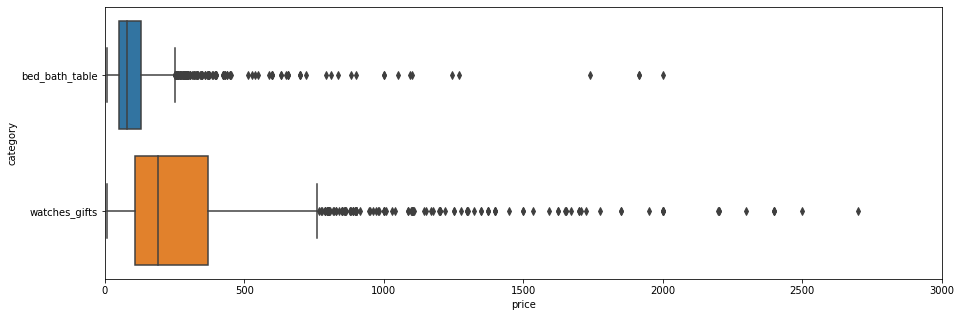

In [ ]:
plt.figure(figsize=(15,5))
# plt.suptitle('Top2 potential category price range distribution')

sns.boxplot(data=mean_price, x='price',y='category')
plt.xlim(0,3000)

plt.show()

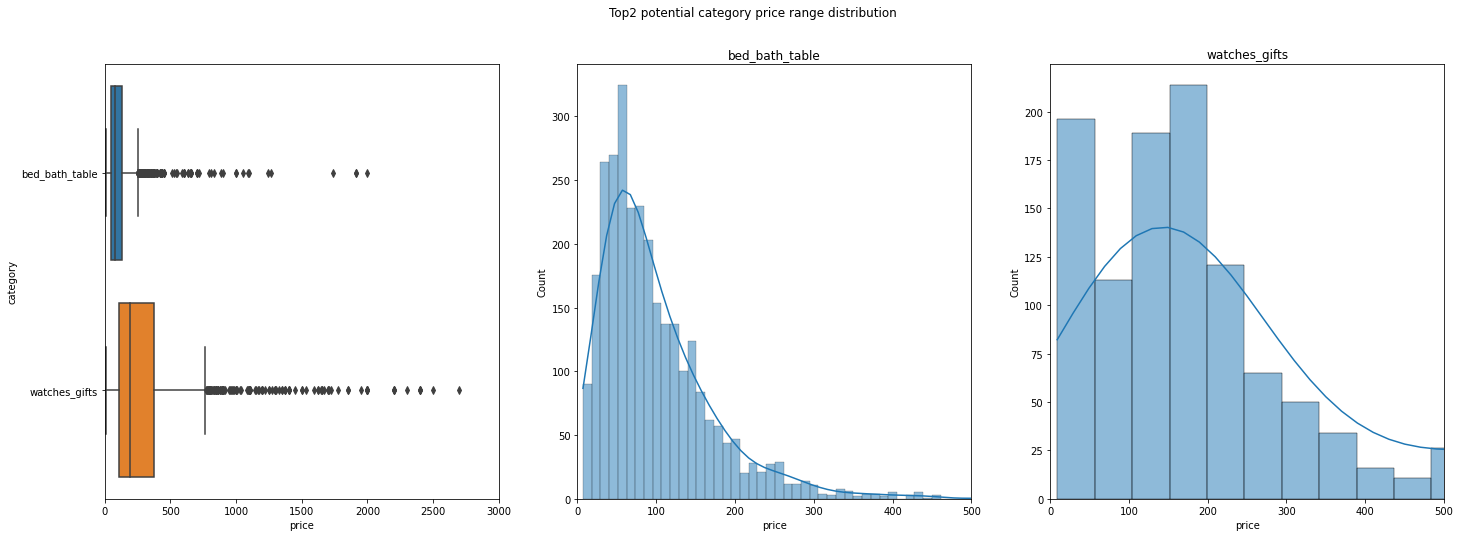

In [ ]:
plt.figure(figsize=(24,8))
plt.suptitle('Top2 potential category price range distribution')

plt.subplot(131)
sns.boxplot(data=mean_price, x='price',y='category')
plt.xlim(0,3000)

plt.subplot(132)
plt.title('bed_bath_table')
sns.histplot(data=bed_bath_table.groupby('product_id')['price'].mean().reset_index(), x='price', kde=True)
plt.xlim(0,500)

plt.subplot(133)
plt.title('watches_gifts')
sns.histplot(data=watches_gifts.groupby('product_id')['price'].mean().reset_index(), x='price',kde=True)
plt.xlim(0,500)
plt.show()

In [ ]:
bed_bath_table['price'].mode()

0    89.9
dtype: float64

In [ ]:
watches_gifts['price'].mode()

0    29.0
dtype: float64

In [ ]:
product_dict= {'order_item_id':'count',
               'product_name_lenght':'mean',
               'product_description_lenght':'mean',
               'product_photos_qty':'mean',
               'product_weight_g':'mean',
               'product_length_cm':'mean',
               'product_height_cm':'mean', 
               'product_width_cm':'mean',
               'price':'mean'}
#  'total_freight_value':'sum',
#  'total_revenue':'sum'}

In [ ]:
all_product_size = final_products_sellers.groupby('product_id').agg(product_dict).reset_index()
all_product_size

,product_id,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,00066f42aeeb9f3007548bb9d3f33c38,1,53.0,596.0,6.0,300.0,20.0,16.0,16.0,101.65
1,00088930e925c41fd95ebfe695fd2655,1,56.0,752.0,4.0,1225.0,55.0,10.0,26.0,129.90
2,0009406fd7479715e4bef61dd91f2462,1,50.0,266.0,2.0,300.0,45.0,15.0,35.0,229.00
3,000b8f95fcb9e0096488278317764d19,2,25.0,364.0,3.0,550.0,19.0,24.0,12.0,58.90
4,000d9be29b5207b54e86aa1b1ac54872,1,48.0,613.0,4.0,250.0,22.0,11.0,15.0,199.00
...,...,...,...,...,...,...,...,...,...,...
31626,fff6177642830a9a94a0f2cba5e476d1,2,54.0,842.0,1.0,1400.0,42.0,25.0,15.0,114.99
31627,fff81cc3158d2725c0655ab9ba0f712c,1,54.0,643.0,1.0,58.0,16.0,16.0,11.0,90.00
31628,fff9553ac224cec9d15d49f5a263411f,1,22.0,328.0,3.0,150.0,16.0,13.0,11.0,32.00
31629,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,47.0,501.0,5.0,150.0,16.0,4.0,13.0,33.99


In [ ]:
top2_product_size = top2_potential.groupby('product_id').agg(product_dict).reset_index()
top2_product_size.head()

,product_id,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,0009406fd7479715e4bef61dd91f2462,1,50.0,266.0,2.0,300.0,45.0,15.0,35.0,229.0
1,000d9be29b5207b54e86aa1b1ac54872,1,48.0,613.0,4.0,250.0,22.0,11.0,15.0,199.0
2,001b237c0e9bb435f2e54071129237e9,1,42.0,253.0,1.0,6000.0,40.0,4.0,30.0,78.9
3,001c5d71ac6ad696d22315953758fa04,1,50.0,381.0,1.0,1800.0,47.0,21.0,41.0,79.9
4,0085dddda27567189f1dfd1eda7c286e,1,58.0,593.0,1.0,1800.0,40.0,8.0,30.0,179.8


Heatmap biểu diễn mức độ tương quan giữa những giá trị của kích thước (chiều dài, chiều rộng, chiều cao, trọng lượng), thông tin sản phẩm (độ dài tên, độ dài mô tả, số lượng hình ảnh) đối với giá trị sản phẩm như thế nào.

* Heatmap Correlation giữa các feature trên so với giá trên toàn bộ ngành hàng/sản phẩm

In [ ]:
all_product_size.corr().style.background_gradient(cmap='Blues')

,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
order_item_id,1.000000,0.008533,0.006821,0.003143,-0.012250,-0.010203,-0.006868,-0.001993,-0.032878
product_name_lenght,0.008533,1.000000,0.097540,0.135065,0.046291,0.084732,-0.015080,0.072703,0.030635
product_description_lenght,0.006821,0.097540,1.000000,0.107829,0.060667,0.033848,0.065187,-0.031101,0.193003
product_photos_qty,0.003143,0.135065,0.107829,1.000000,0.036890,0.068944,0.003593,0.026888,0.058917
product_weight_g,-0.012250,0.046291,0.060667,0.036890,1.000000,0.475608,0.564690,0.528444,0.349968
product_length_cm,-0.010203,0.084732,0.033848,0.068944,0.475608,1.000000,0.199946,0.541821,0.156776
product_height_cm,-0.006868,-0.015080,0.065187,0.003593,0.564690,0.199946,1.000000,0.310318,0.234680
product_width_cm,-0.001993,0.072703,-0.031101,0.026888,0.528444,0.541821,0.310318,1.000000,0.184033
price,-0.032878,0.030635,0.193003,0.058917,0.349968,0.156776,0.234680,0.184033,1.000000


Nhận xét: Dựa trên bảng dữ liệu của 2 ngành hàng
* Những feature như product_description_lenght, product_photos_qty, product_weight_g, product_height_cm tỉ lệ thuận với price (ảnh hưởng tỉ lệ yếu) với tỉ lệ 14.98%, 12.26%, 10.9%, 12.54%
* Những feature product_length_cm, product_width_cm tỉ lệ nghịch với price với tỉ lệ 12.9%, 11.5% 

* Heatmap correlation bed_bath_table

In [ ]:
bbt_feature = final_products_sellers[final_products_sellers['category'] == 'bed_bath_table'].groupby('product_id').agg(product_dict).reset_index()
bbt_feature.head()

,product_id,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,0009406fd7479715e4bef61dd91f2462,1,50.0,266.0,2.0,300.0,45.0,15.0,35.0,229.0
1,001b237c0e9bb435f2e54071129237e9,1,42.0,253.0,1.0,6000.0,40.0,4.0,30.0,78.9
2,001c5d71ac6ad696d22315953758fa04,1,50.0,381.0,1.0,1800.0,47.0,21.0,41.0,79.9
3,0085dddda27567189f1dfd1eda7c286e,1,58.0,593.0,1.0,1800.0,40.0,8.0,30.0,179.8
4,008686d56f4c85b987a4c24a286834c1,1,44.0,216.0,1.0,2200.0,37.0,10.0,32.0,207.0


In [ ]:
bbt_feature.corr().style.background_gradient(cmap='Blues')

,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
order_item_id,1.000000,-0.001085,-0.017308,0.035813,-0.028490,0.010300,-0.050038,0.014947,-0.039920
product_name_lenght,-0.001085,1.000000,0.044343,0.009562,0.100272,0.053806,-0.015494,0.097948,0.123794
product_description_lenght,-0.017308,0.044343,1.000000,0.254436,0.100019,-0.067363,0.131728,-0.029168,0.107342
product_photos_qty,0.035813,0.009562,0.254436,1.000000,0.079912,0.164737,0.070902,0.121894,0.136058
product_weight_g,-0.028490,0.100272,0.100019,0.079912,1.000000,0.308792,0.501510,0.378162,0.585551
product_length_cm,0.010300,0.053806,-0.067363,0.164737,0.308792,1.000000,0.050747,0.624874,0.305383
product_height_cm,-0.050038,-0.015494,0.131728,0.070902,0.501510,0.050747,1.000000,0.301774,0.320698
product_width_cm,0.014947,0.097948,-0.029168,0.121894,0.378162,0.624874,0.301774,1.000000,0.396595
price,-0.039920,0.123794,0.107342,0.136058,0.585551,0.305383,0.320698,0.396595,1.000000


Trong ngành hàng bed_bath_table, các feature về kích thước và trọng lượng có một mức tương quan nhất định đến giá thành của sản phẩm:
* Trọng lượng sản phẩm tỉ lệ thuận trung bình so với giá (mức tương quan trong khoảng 58.5%): corr(weight, price) = 0.585551
* Các đặc trưng thuộc về kích thước (chiều dài, chiều rộng, chiều cao) cũng có mức tương quan tỉ lệ thuận trung bình với giá (lần lượt 30.5%, 32%, 
*
*


* Heatmap correlation watches_gifts

In [ ]:
wg_feature = final_products_sellers[final_products_sellers['category'] == 'watches_gifts'].groupby('product_id').agg(product_dict).reset_index()
wg_feature.head()

,product_id,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,000d9be29b5207b54e86aa1b1ac54872,1,48.0,613.0,4.0,250.0,22.0,11.0,15.0,199.00
1,008b51e6be49ee039854b5e35c331b02,1,57.0,676.0,2.0,633.0,19.0,12.0,17.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,749.99
3,00df6fc5f33cc3f7ceec4ec6337d9cd7,1,51.0,314.0,3.0,500.0,20.0,15.0,17.0,999.99
4,0127db1f4effcf8f5b88d80588bc5624,2,53.0,555.0,1.0,200.0,20.0,7.0,15.0,49.00


In [ ]:
wg_feature.corr().style.background_gradient(cmap='Blues')

,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
order_item_id,1.000000,-0.049628,0.020086,0.050881,0.019591,0.014891,-0.081023,-0.003139,-0.092559
product_name_lenght,-0.049628,1.000000,0.063919,0.232430,-0.090205,-0.048365,-0.327803,-0.081300,-0.150822
product_description_lenght,0.020086,0.063919,1.000000,-0.004102,0.008215,0.069629,0.146381,-0.084126,0.104742
product_photos_qty,0.050881,0.232430,-0.004102,1.000000,-0.052684,-0.012198,-0.258290,0.011185,-0.065099
product_weight_g,0.019591,-0.090205,0.008215,-0.052684,1.000000,0.175134,0.095850,0.135619,0.047268
product_length_cm,0.014891,-0.048365,0.069629,-0.012198,0.175134,1.000000,0.217876,0.592262,-0.011257
product_height_cm,-0.081023,-0.327803,0.146381,-0.258290,0.095850,0.217876,1.000000,0.226691,0.340580
product_width_cm,-0.003139,-0.081300,-0.084126,0.011185,0.135619,0.592262,0.226691,1.000000,-0.019702
price,-0.092559,-0.150822,0.104742,-0.065099,0.047268,-0.011257,0.340580,-0.019702,1.000000


In [ ]:
wg_feature

,product_id,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,000d9be29b5207b54e86aa1b1ac54872,1,48.0,613.0,4.0,250.0,22.0,11.0,15.0,199.000000
1,008b51e6be49ee039854b5e35c331b02,1,57.0,676.0,2.0,633.0,19.0,12.0,17.0,270.900000
2,00cc15e0cef551848c797ab75ba904b1,1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,749.990000
3,00df6fc5f33cc3f7ceec4ec6337d9cd7,1,51.0,314.0,3.0,500.0,20.0,15.0,17.0,999.990000
4,0127db1f4effcf8f5b88d80588bc5624,2,53.0,555.0,1.0,200.0,20.0,7.0,15.0,49.000000
...,...,...,...,...,...,...,...,...,...,...
1295,ff5d87897ed26d564711df324b98ebee,6,49.0,443.0,2.0,350.0,19.0,13.0,19.0,274.900000
1296,ff7b4560eaf93a8848cd5fde641f39c6,1,60.0,697.0,2.0,250.0,16.0,11.0,12.0,179.900000
1297,ff80f0538290775336ee74b4997a855c,1,44.0,1484.0,1.0,333.0,28.0,13.0,15.0,136.900000
1298,ffd2365fb8224dc66883df9351d65deb,3,60.0,630.0,2.0,333.0,16.0,12.0,13.0,945.266667


###2. Analyze Feature: Feature and Price correlation


Để tiếp tục, chúng ta sẽ phân tích vào những feature có mức độ tương quan đến giá trị sản phẩm:

- bed_bath_table
- watches_gifts

* *product_name_length*

In [ ]:
top2_product_size.head()

,product_id,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,0009406fd7479715e4bef61dd91f2462,1,50.0,266.0,2.0,300.0,45.0,15.0,35.0,229.0
1,000d9be29b5207b54e86aa1b1ac54872,1,48.0,613.0,4.0,250.0,22.0,11.0,15.0,199.0
2,001b237c0e9bb435f2e54071129237e9,1,42.0,253.0,1.0,6000.0,40.0,4.0,30.0,78.9
3,001c5d71ac6ad696d22315953758fa04,1,50.0,381.0,1.0,1800.0,47.0,21.0,41.0,79.9
4,0085dddda27567189f1dfd1eda7c286e,1,58.0,593.0,1.0,1800.0,40.0,8.0,30.0,179.8


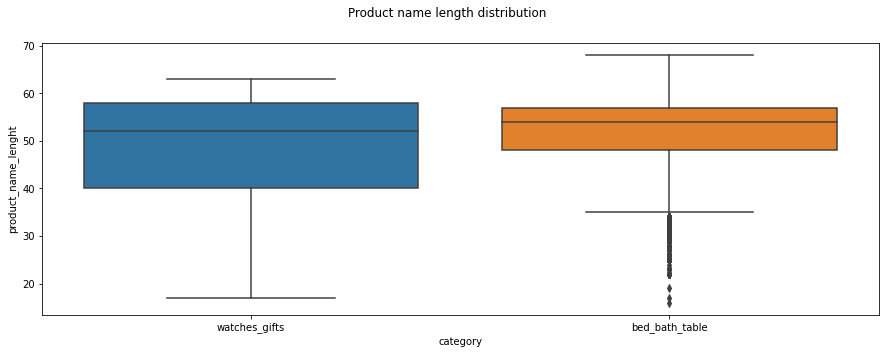

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Product name length distribution')

sns.boxplot(data=top2_potential, x='category', y='product_name_lenght')

plt.show()

In [ ]:
top2_potential['product_name_lenght'].describe()

count    17891.000000
mean        50.572746
std          8.734178
min         16.000000
25%         46.000000
50%         54.000000
75%         58.000000
max         68.000000
Name: product_name_lenght, dtype: float64

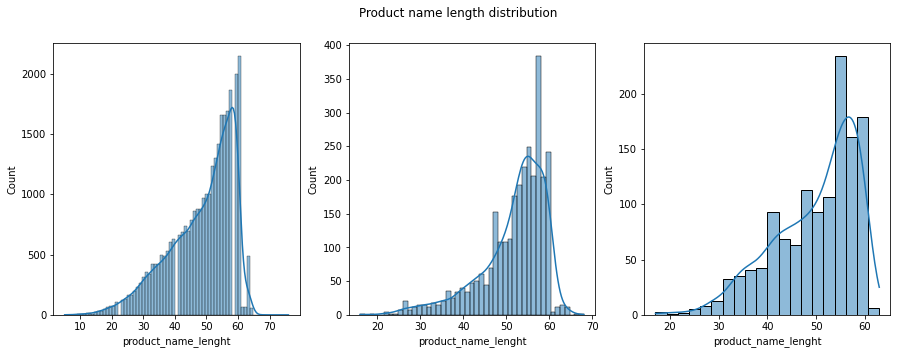

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Product name length distribution')

plt.subplot(131)
sns.histplot(data=all_product_size, x='product_name_lenght', kde=True)

plt.subplot(132)
sns.histplot(data=bbt_feature, x='product_name_lenght', kde=True)

plt.subplot(133)
sns.histplot(data=wg_feature, x='product_name_lenght', kde=True)
plt.show()

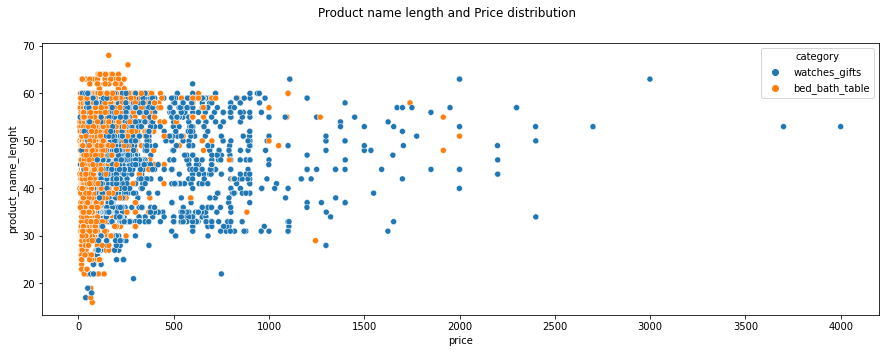

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Product name length and Price distribution')

sns.scatterplot(data=top2_potential, y='product_name_lenght', x='price', hue='category')

plt.show()



*   *product_description_length*



In [ ]:
top2_product_size.head()

,product_id,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,0009406fd7479715e4bef61dd91f2462,1,50.0,266.0,2.0,300.0,45.0,15.0,35.0,229.0
1,000d9be29b5207b54e86aa1b1ac54872,1,48.0,613.0,4.0,250.0,22.0,11.0,15.0,199.0
2,001b237c0e9bb435f2e54071129237e9,1,42.0,253.0,1.0,6000.0,40.0,4.0,30.0,78.9
3,001c5d71ac6ad696d22315953758fa04,1,50.0,381.0,1.0,1800.0,47.0,21.0,41.0,79.9
4,0085dddda27567189f1dfd1eda7c286e,1,58.0,593.0,1.0,1800.0,40.0,8.0,30.0,179.8


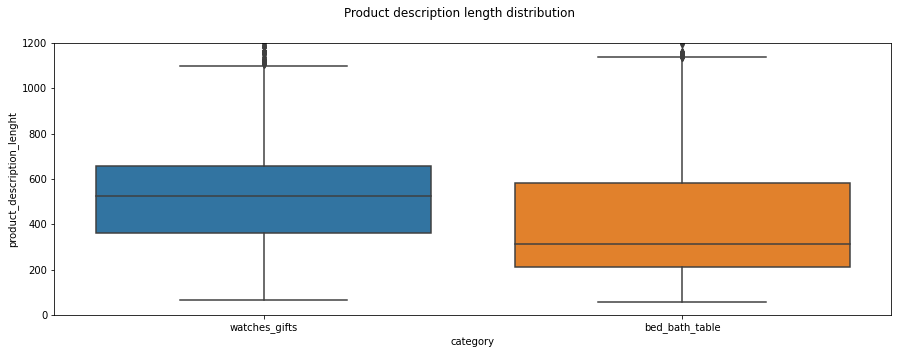

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Product description length distribution')

sns.boxplot(data=top2_potential, x='category', y='product_description_lenght')
plt.ylim(0,1200)
plt.show()

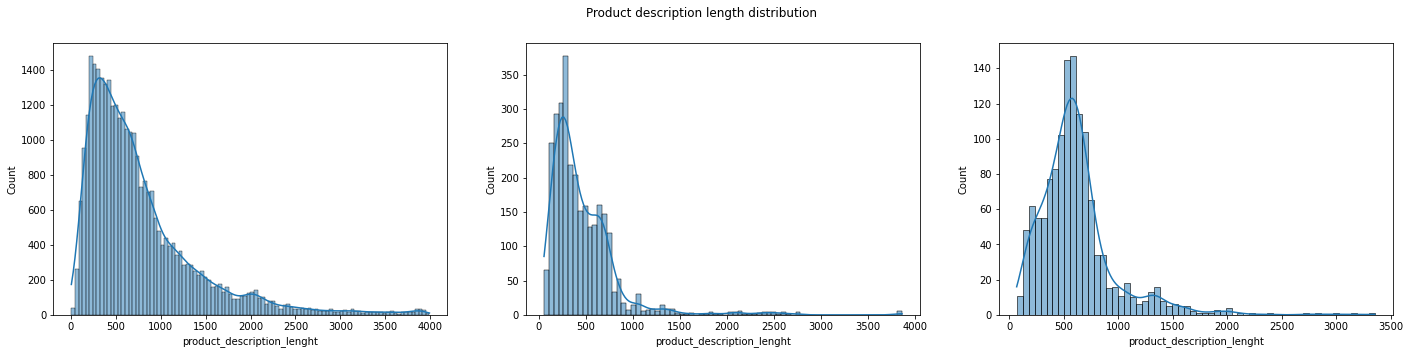

In [ ]:
plt.figure(figsize=(24,5))
plt.suptitle('Product description length distribution')

plt.subplot(131)
sns.histplot(data=all_product_size, x='product_description_lenght', kde=True)

plt.subplot(132)
sns.histplot(data=bbt_feature, x='product_description_lenght', kde=True)

plt.subplot(133)
sns.histplot(data=wg_feature, x='product_description_lenght', kde=True)
plt.show()

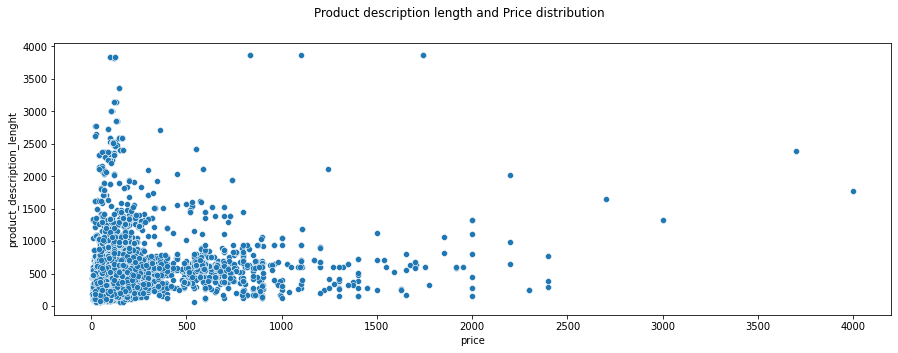

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Product description length and Price distribution')

sns.scatterplot(data=top2_potential, y='product_description_lenght', x='price')

plt.show()

* *product_photos_qty*

In [ ]:
top2_product_size.head()

,product_id,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,0009406fd7479715e4bef61dd91f2462,1,50.0,266.0,2.0,300.0,45.0,15.0,35.0,229.0
1,000d9be29b5207b54e86aa1b1ac54872,1,48.0,613.0,4.0,250.0,22.0,11.0,15.0,199.0
2,001b237c0e9bb435f2e54071129237e9,1,42.0,253.0,1.0,6000.0,40.0,4.0,30.0,78.9
3,001c5d71ac6ad696d22315953758fa04,1,50.0,381.0,1.0,1800.0,47.0,21.0,41.0,79.9
4,0085dddda27567189f1dfd1eda7c286e,1,58.0,593.0,1.0,1800.0,40.0,8.0,30.0,179.8


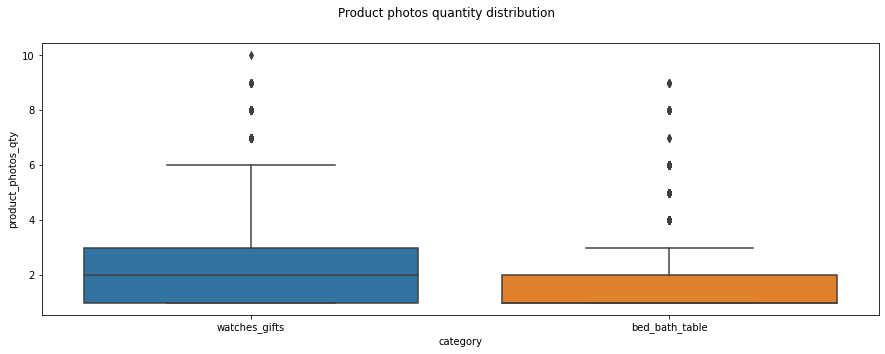

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Product photos quantity distribution')

sns.boxplot(data=top2_potential, x='category', y='product_photos_qty')
# plt.ylim(0,1200)
plt.show()

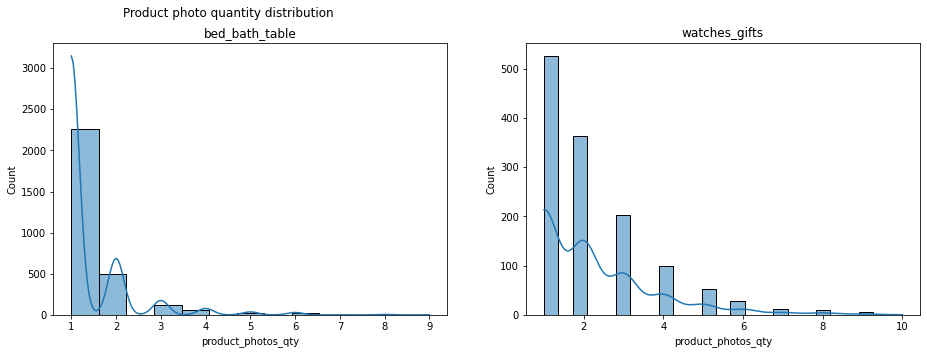

In [ ]:
plt.figure(figsize=(24,5))
plt.suptitle('Product photo quantity distribution')

# plt.subplot(131)
# sns.histplot(data=all_product_size, x='product_photos_qty', kde=True)
# plt.title('All products')
plt.subplot(132)
sns.histplot(data=bbt_feature, x='product_photos_qty', kde=True)
plt.title('bed_bath_table')

plt.subplot(133)
sns.histplot(data=wg_feature, x='product_photos_qty', kde=True)
plt.title('watches_gifts')

plt.show()

In [ ]:
all_product_size.head()

,product_id,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,00066f42aeeb9f3007548bb9d3f33c38,1,53.0,596.0,6.0,300.0,20.0,16.0,16.0,101.65
1,00088930e925c41fd95ebfe695fd2655,1,56.0,752.0,4.0,1225.0,55.0,10.0,26.0,129.90
2,0009406fd7479715e4bef61dd91f2462,1,50.0,266.0,2.0,300.0,45.0,15.0,35.0,229.00
3,000b8f95fcb9e0096488278317764d19,2,25.0,364.0,3.0,550.0,19.0,24.0,12.0,58.90
4,000d9be29b5207b54e86aa1b1ac54872,1,48.0,613.0,4.0,250.0,22.0,11.0,15.0,199.00


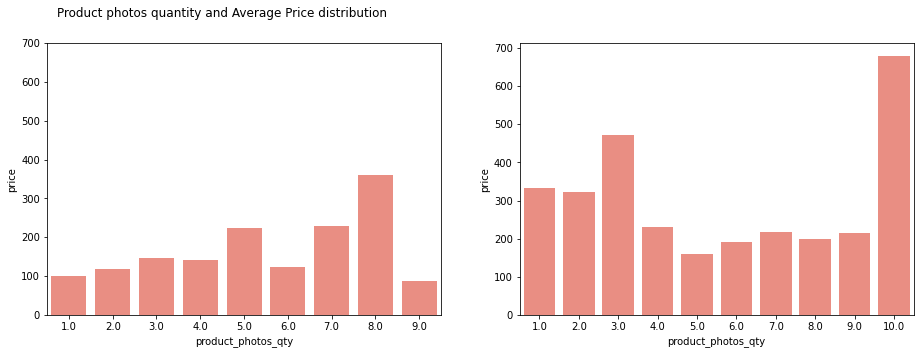

In [ ]:
plt.figure(figsize=(24,5))
plt.suptitle('Product photos quantity and Average Price distribution')

# plt.subplot(131)
# sns.barplot(data=all_product_size.groupby('product_photos_qty')['price'].mean().reset_index(), x='product_photos_qty', y='price', color='salmon')

plt.subplot(132)
sns.barplot(data=bbt_feature.groupby('product_photos_qty')['price'].mean().reset_index(), x='product_photos_qty', y='price', color='salmon')
plt.ylim(0,700)

plt.subplot(133)
sns.barplot(data=wg_feature.groupby('product_photos_qty')['price'].mean().reset_index(), x='product_photos_qty', y='price', color='salmon')
plt.show()

* *product_weight_g*

In [ ]:
top2_product_size.head()

,product_id,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,0009406fd7479715e4bef61dd91f2462,1,50.0,266.0,2.0,300.0,45.0,15.0,35.0,229.0
1,000d9be29b5207b54e86aa1b1ac54872,1,48.0,613.0,4.0,250.0,22.0,11.0,15.0,199.0
2,001b237c0e9bb435f2e54071129237e9,1,42.0,253.0,1.0,6000.0,40.0,4.0,30.0,78.9
3,001c5d71ac6ad696d22315953758fa04,1,50.0,381.0,1.0,1800.0,47.0,21.0,41.0,79.9
4,0085dddda27567189f1dfd1eda7c286e,1,58.0,593.0,1.0,1800.0,40.0,8.0,30.0,179.8


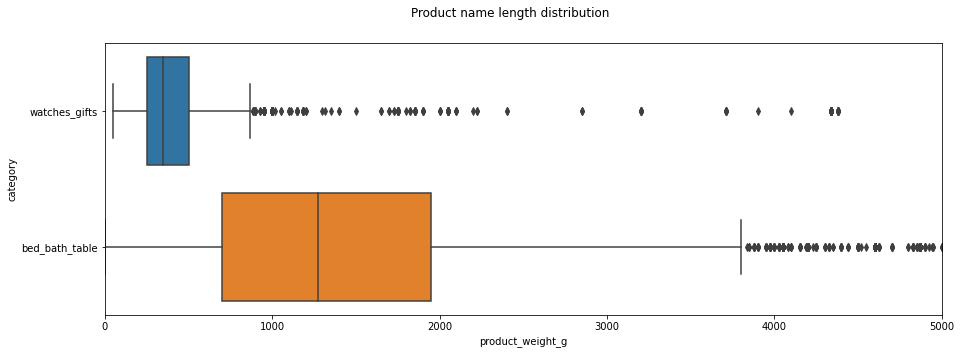

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Product name length distribution')

sns.boxplot(data=top2_potential, y='category', x='product_weight_g')
plt.xlim(0,5000)
plt.show()

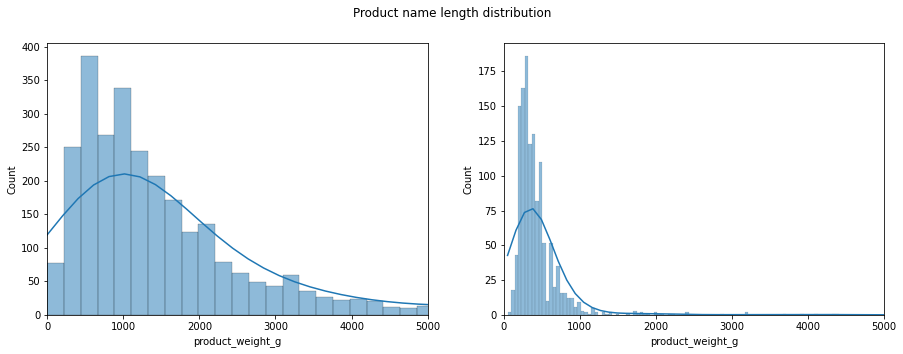

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Product name length distribution')

# plt.subplot(131)
# sns.histplot(data=all_product_size, x='product_weight_g', kde=True)

plt.subplot(121)
sns.histplot(data=bbt_feature, x='product_weight_g', kde=True)
plt.xlim(0,5000)

plt.subplot(122)
sns.histplot(data=wg_feature, x='product_weight_g', kde=True)
plt.xlim(0,5000)
plt.ylim()
plt.show()

In [ ]:
bbt_feature.head()

,product_id,order_item_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,0009406fd7479715e4bef61dd91f2462,1,50.0,266.0,2.0,300.0,45.0,15.0,35.0,229.0
1,001b237c0e9bb435f2e54071129237e9,1,42.0,253.0,1.0,6000.0,40.0,4.0,30.0,78.9
2,001c5d71ac6ad696d22315953758fa04,1,50.0,381.0,1.0,1800.0,47.0,21.0,41.0,79.9
3,0085dddda27567189f1dfd1eda7c286e,1,58.0,593.0,1.0,1800.0,40.0,8.0,30.0,179.8
4,008686d56f4c85b987a4c24a286834c1,1,44.0,216.0,1.0,2200.0,37.0,10.0,32.0,207.0


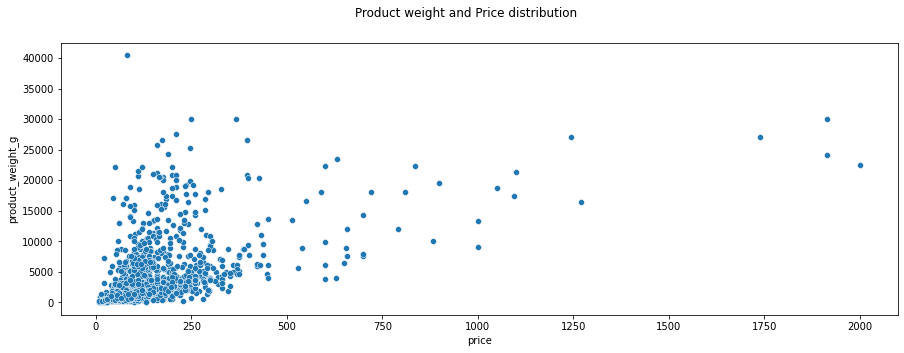

In [ ]:
plt.figure(figsize=(15,5))
plt.suptitle('Product weight and Price distribution')

sns.scatterplot(data=bbt_feature, y='product_weight_g', x='price')

plt.show()

Phân bố theo khoảng giá và tổng giá trị sản phẩm:

In [ ]:
final_products_sellers.groupby('product_id')['price'].mean().reset_index()['price'].describe()

count    31631.000000
mean       144.834348
std        245.833354
min          0.850000
25%         39.900000
50%         79.000000
75%        154.900000
max       6735.000000
Name: price, dtype: float64

* Low: < 39.9
* Medium: trong khoảng 39.9 đến 154.9
* High: > 154.9

In [ ]:
# def price_segment(row):
#   if row['price']<=39.9:
#     return 'low'
#   if 39.9<row['price'] and row['price']<=154.9:
#     return 'medium'
#   if row['price']>154.9:
#     return 'high'

In [ ]:
# final_products_sellers['price_segment'] = final_products_sellers.apply(price_segment,axis=1)

In [ ]:
final_products_sellers

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,1,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,81810,curitiba,PR,6916ca4502d6d3bfd39818759d55d536,1.0,1.0,credit_card,1.0,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,2016-11
1,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,2,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,81810,curitiba,PR,6916ca4502d6d3bfd39818759d55d536,1.0,1.0,credit_card,1.0,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,2016-11
2,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0,bfbd0f9bdef84302105ad712db648a6c,3,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,81810,curitiba,PR,6916ca4502d6d3bfd39818759d55d536,1.0,1.0,credit_card,1.0,NaN,830d5b7aaa3b6f1e9ad63703bec97d23,14600,sao joaquim da barra,SP,2016-11
3,watches_gifts,3ae08df6bcbfe23586dd431c40bddbb7,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,3b697a20d9e427646d92567910af6d57,1,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,85801,cascavel,PR,9fe0f66724df77fd63fcc0c94a323978,4.0,1.0,boleto,1.0,45.46,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,2016-10
4,sports_leisure,fd7fd78fd3cbc1b0a6370a7909c0a629,39.0,518.0,1.0,400.0,16.0,16.0,16.0,be5bc2f0da14d8071e2d45451ad119d9,1,f09b760d23495ac9a7e00d29b769007c,2016-10-21 16:33:46,21.90,17.19,7ec40b22510fdbea1b08921dd39e63d8,delivered,2016-10-03 16:56:50,2016-10-06 16:03:44,2016-10-21 16:33:46,2016-10-27 18:19:38,2016-11-07,15802,catanduva,SP,dc62f1e20d7f280e54066b6a92841086,4.0,1.0,boleto,1.0,39.09,2f64e403852e6893ae37485d5fcacdaf,98280,panambi,RS,2016-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114079,kitchen_dining_laundry_garden_furniture,2b4472df15512a2825ae86fd9ae79335,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,0b223d92c27432930dfe407c6aea3041,2,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,82400,curitiba,PR,6c50d16eb583d5db7e841b77e89b7045,5.0,1.0,credit_card,8.0,510.96,5c58de6fb80e93396e2f35642666b693,80045,curitiba,PR,2018-08
114080,kitchen_dining_laundry_garden_furniture,2b4472df15512a2825ae86fd9ae79335,44.0,112.0,1.0,13550.0,48.0,49.0,49.0,0b223d92c27432930dfe407c6aea3041,1,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,e60df9449653a95af4549bbfcb18a6eb,delivered,2018-08-29 14:18:23,2018-08-29 14:31:07,2018-08-29 15:29:00,2018-08-30 16:24:55,2018-09-04,82400,curitiba,PR,6c50d16eb583d5db7e841b77e89b7045,5.0,1.0,credit_card,

### 3. bed_bath_table market share

In [ ]:
bed_bath_table

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,bed_bath_table,66e08854f9319c6aa4874ca435598331,54.0,584.0,1.0,1400.0,33.0,8.0,23.0,bcbc0973414b1dd97555e6f8e9713cfa,3,cca3071e3e9bb7d12640c9fbe2301306,2016-10-09 03:45:42,79.90,15.91,3f6f000d5b0a959f38481fad4ab7cac2,delivered,2016-10-04 23:59:01,2016-10-05 03:45:41,2016-10-09 03:45:42,2016-10-16 10:41:50,2016-11-28,14940,ibitinga,SP,98de2ed46bf9a8835089f29126a41a13,5.0,1.0,credit_card,3.0,383.24,221234182f828fb9f2a4ba9c89874ede,87820,cidade gaucha,PR,2016-10
1,bed_bath_table,48a12f318432c4b6a1fdfd5d79372e66,54.0,584.0,1.0,1200.0,33.0,8.0,23.0,bcbc0973414b1dd97555e6f8e9713cfa,1,cca3071e3e9bb7d12640c9fbe2301306,2016-10-09 03:45:42,79.90,15.91,3f6f000d5b0a959f38481fad4ab7cac2,delivered,2016-10-04 23:59:01,2016-10-05 03:45:41,2016-10-09 03:45:42,2016-10-16 10:41:50,2016-11-28,14940,ibitinga,SP,98de2ed46bf9a8835089f29126a41a13,5.0,1.0,credit_card,3.0,383.24,221234182f828fb9f2a4ba9c89874ede,87820,cidade gaucha,PR,2016-10
2,bed_bath_table,33e0cfd1cd80a0491da068d7a7f93ff8,44.0,501.0,1.0,2400.0,30.0,30.0,30.0,3b2ca3293a7ce539ea2379d704fa37ce,1,dd2bdf855a9172734fbc3744021ae9b9,2016-10-10 15:47:18,169.90,14.97,06a70917afd2dcd59396e1eac836c646,delivered,2016-10-05 12:44:09,2016-10-06 15:47:17,2016-11-17 11:54:02,2016-11-17 19:53:49,2016-11-25,31255,belo horizonte,MG,41deaffcf6deae0e5bda248b70048469,5.0,1.0,credit_card,5.0,184.87,451c36d15ca9729da50f130f5c0f1c59,31870,belo horizonte,MG,2016-11
3,bed_bath_table,33ec1056063990a554e2e2cd85219de5,60.0,624.0,2.0,400.0,57.0,4.0,28.0,f205336be829af209878b6339cf02c7e,1,cca3071e3e9bb7d12640c9fbe2301306,2016-10-21 16:33:59,59.90,14.69,bea482168e59ee99ecadacecb808d058,delivered,2016-10-06 09:59:13,2016-10-06 15:56:43,2016-10-21 11:36:05,2016-10-27 17:55:56,2016-11-30,14940,ibitinga,SP,8ee14babdad4ad45c1188f8a93b58b14,5.0,1.0,credit_card,1.0,74.59,4bb9eff279b892251d672d74a4272434,23075,rio de janeiro,RJ,2016-10
4,bed_bath_table,7721582bb750762d81850267d19881c1,63.0,837.0,1.0,1400.0,43.0,5.0,30.0,6e5fe7366a2e1bfbf3257dba0af1267f,5,0c8380b62e38e8a1e6adbeba7eb9688c,2016-10-14 12:02:21,19.83,17.00,5263febf1413e9a60ceb7b842008b7ef,delivered,2016-10-09 22:36:25,2016-10-10 12:02:19,2016-10-14 12:02:21,2016-10-17 13:02:21,2016-12-06,37410,tres coracoes,MG,3918306fc04f31c393a12070f6e66966,1.0,1.0,credit_card,10.0,406.92,6f90ec5150be36c4475835b5941ab56f,82980,curitiba,PR,2016-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11809,bed_bath_table,49d23d4887468040921b413a6d4f3ec7,52.0,1072.0,1.0,1350.0,39.0,7.0,31.0,1776f9cc0f976e7aa0e8372a5325c41a,1,8a432f4e5b471f8da497d7dc517666e2,2018-08-30 11:30:12,69.00,13.14,fa62a9ef95e703b49c4bf530ce1e4efb,delivered,2018-08-28 11:16:37,2018-08-28 11:30:12,2018-08-28 14:11:00,2018-08-29 22:03:15,2018-09-06,19042,presidente prudente,SP,e5b3c0be82a0166d3a19a2d96a161f13,2.0,1.0,credit_card,8.0,82.14,dad1eb1624d037f15eeac6c2c2cd0843,13082,campinas,SP,2018-08
11810,bed_bath_table,0896208dd8490b3dbb75344a92ab4106,56.0,1023.0,1.0,1350.0,36.0,20.0,36.0,a305557a41b3c1889b8e0d9255f9ef1a,1,b9ca8e8baa5d4aa038394a700f63e69f,2018-08-31 12:50:22,63.99,11.47,d84a9738d613b69719f0bac7a49a7b65,delivered,2018-08-28 12:38:17,2018-08-28 12:50:22,2018-08-28 15:16:00,2018-08-31 01:32:26,2018-09-05,3001,sao paulo,SP,b01c713ffbe4f0c260a93d8380d953c0,3.0,1.0,credit_card,2.0,75.46,2c1909908a8785c7

In [ ]:
bed_bath_table.groupby('seller_id')['price'].sum().reset_index().sort_values(by='price', ascending=False)

,seller_id,price
68,4a3ca9315b744ce9f8e9374361493884,174636.90
167,da8622b14eb17ae2831f4ac5b9dab84a,162866.70
52,37be5a7c751166fbc5f8ccba4119e043,56454.17
108,8160255418d5aaa7dbdc9f4c64ebda44,47453.80
20,1835b56ce799e6a4dc4eddc053f04066,33749.68
...,...,...
104,7caa63f175b1cecbfaadd8b5ab9998c7,19.90
33,20f0aeea30bc3b8c4420be8ced4226c0,14.90
102,7ab0dd5487bab2dc835337b244f689fb,12.50
182,f049a72cf58fd31b11f8919cade515e7,12.25


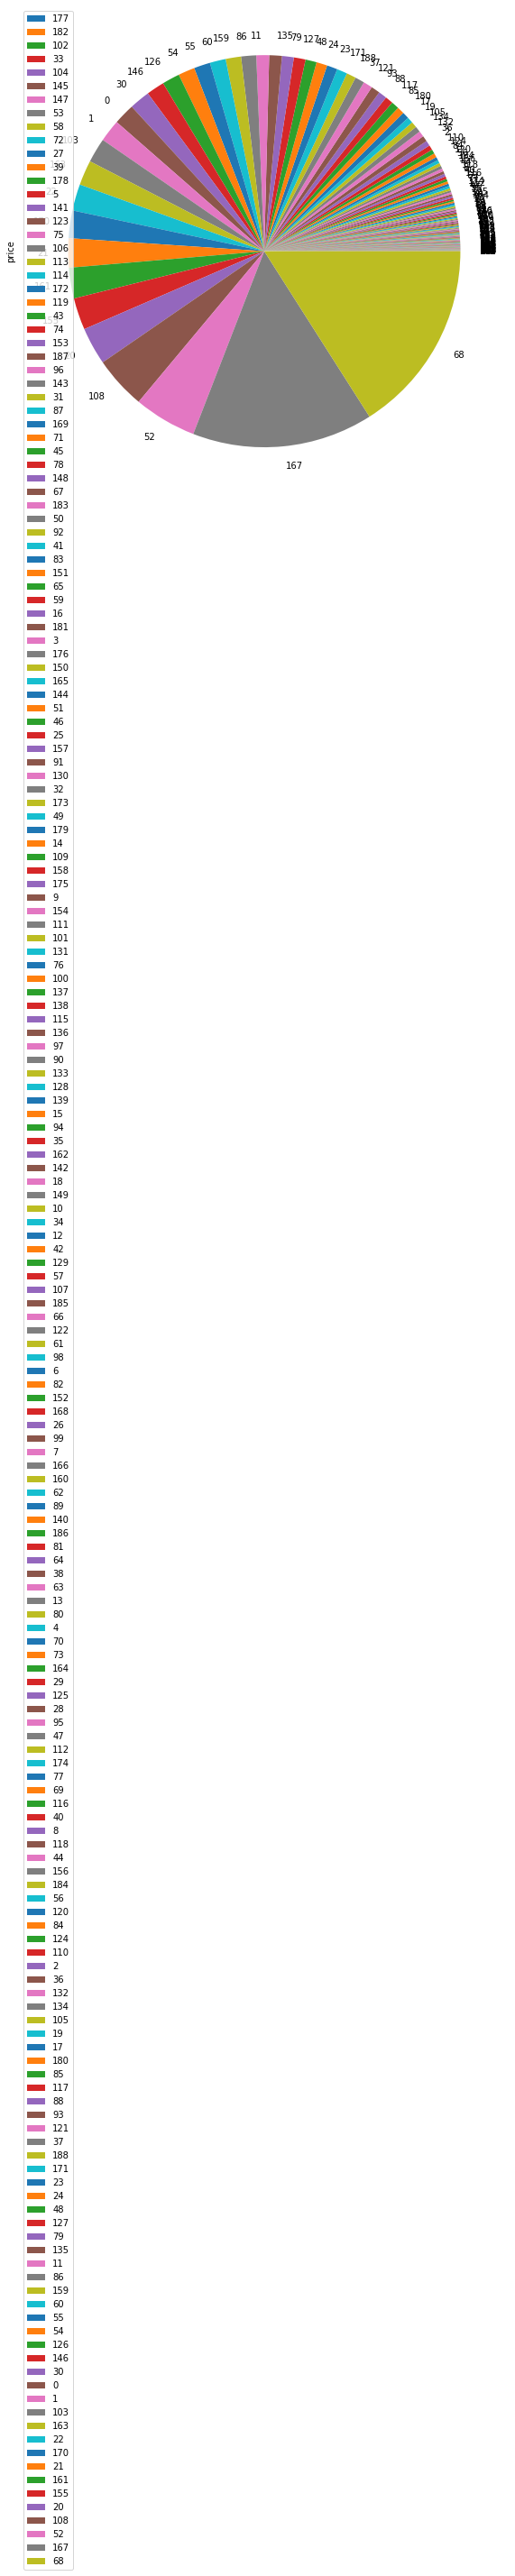

In [ ]:
bed_bath_table.groupby('seller_id')['price'].sum().reset_index().sort_values(by='price', ascending=True).plot(kind='pie', y ='price', figsize=(20,10))

### watches_gifts market share

In [ ]:
watches_gifts.groupby('seller_id')['price'].sum().reset_index().sort_values(by='price', ascending=False)

,seller_id,price
24,4869f7a5dfa277a7dca6462dcf3b52b2,206250.03
92,fa1c13f2614d7b5c4749cbc52fecda94,198910.04
50,7e93a43ef30c4f03f38b393420bc753a,166303.97
38,6560211a19b47992c3666cc44a7e94c0,102756.00
49,7d13fca15225358621be4086e1eb0964,96293.16
...,...,...
55,89f69225956f951295ca4c7fb1266553,52.90
17,2ff97219cb8622eaf3cd89b7d9c09824,36.90
54,891071be6ba827b591264c90c2ae8a63,25.00
47,75d34ebb1bd0bd7dde40dd507b8169c3,10.99


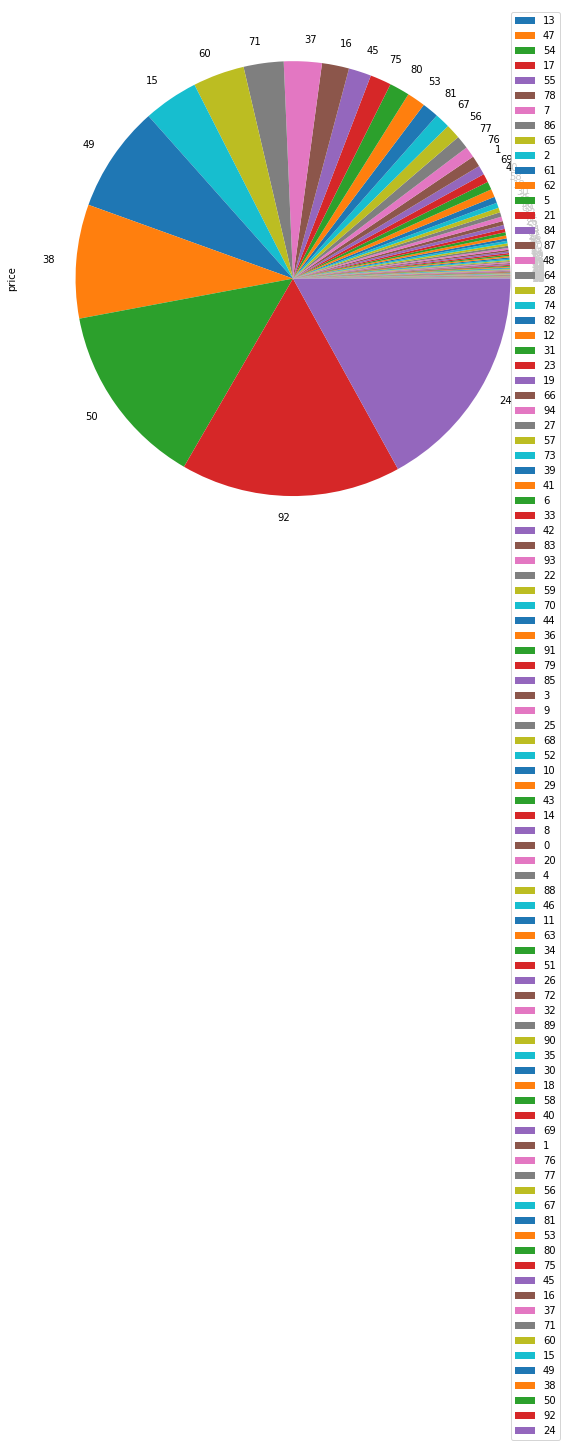

In [ ]:
watches_gifts.groupby('seller_id')['price'].sum().reset_index().sort_values(by='price', ascending=True).plot(kind='pie', y ='price', figsize=(20,10))

### watches_gifts customer's location

In [ ]:
watches_gifts.head()

,category,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,SellerYearMonth
0,watches_gifts,3ae08df6bcbfe23586dd431c40bddbb7,63.0,1642.0,3.0,300.0,16.0,16.0,16.0,3b697a20d9e427646d92567910af6d57,1,522620dcb18a6b31cd7bdf73665113a9,2016-10-21 16:27:20,29.90,15.56,355077684019f7f60a031656bd7262b8,delivered,2016-10-03 09:44:50,2016-10-06 15:50:54,2016-10-23 14:02:13,2016-10-26 14:02:13,2016-10-27,85801,cascavel,PR,9fe0f66724df77fd63fcc0c94a323978,4.0,1.0,boleto,1.0,45.46,32ea3bdedab835c3aa6cb68ce66565ef,4106,sao paulo,SP,2016-10
1,watches_gifts,545085671b9f2d7d2e1a9110b15d838c,43.0,1534.0,2.0,413.0,19.0,12.0,15.0,1970f2fb4b83ff962a75b064abc37f4c,1,4d600e08ecbe08258c79e536c5a42fee,2016-10-21 16:32:32,633.00,20.39,45b5b5e9424ca746ad6a3161de453e00,delivered,2016-10-06 07:53:10,2016-10-07 02:47:36,2016-10-21 16:32:32,2016-10-28 10:24:36,2016-11-30,85988,entre rios do oeste,PR,30438651b2a9f883ff03c86129aed070,5.0,1.0,boleto,1.0,653.39,4543480cbf99692641f5b35eeae7947f,13487,limeira,SP,2016-10
2,watches_gifts,09b590ada623ecf66329917ea4731957,44.0,1396.0,2.0,214.0,17.0,11.0,13.0,1c4cafd25254eee31c8c9b8c141fb10a,1,4d600e08ecbe08258c79e536c5a42fee,2016-10-21 16:38:22,649.17,22.14,b03bfe9da81252f5e3b39196ba3518c0,delivered,2016-10-06 10:12:12,2016-10-06 16:01:15,2016-10-21 16:38:22,2016-10-27 11:43:40,2016-12-06,85988,entre rios do oeste,PR,8abb8dd1b12844a0af1a09b7b270a00b,5.0,1.0,credit_card,4.0,671.31,ac10064713bd3169f17aed85acad2106,71020,brasilia,DF,2016-10
3,watches_gifts,fd8a5b9a8a79d7ba0739d69be5dc5aa1,44.0,394.0,3.0,850.0,17.0,13.0,15.0,bc0e0c28cbe995798d3afb7c7c75d269,1,7e93a43ef30c4f03f38b393420bc753a,2016-10-12 03:19:10,1399.00,24.55,a9dc96b027d1252bbac0a9b72d837fc6,delivered,2016-10-08 01:28:14,2016-10-08 03:19:09,2016-10-14 17:39:46,2016-10-17 18:39:46,2016-12-02,6429,barueri,SP,419ad0bca36f52cf9b91262de3394564,5.0,1.0,credit_card,10.0,1423.55,fdaa290acb9eeacb66fa7f979baa6803,23012,rio de janeiro,RJ,2016-10
4,watches_gifts,368343a35b2e888dae4f3f831d22437a,42.0,748.0,2.0,300.0,16.0,13.0,13.0,9a3e437ab219133c20a7033be9087edf,1,fa1c13f2614d7b5c4749cbc52fecda94,2017-01-11 20:45:31,149.00,15.21,3c03fed2df425b8291c5913c52b51b84,delivered,2017-01-07 20:45:31,2017-01-07 20:55:10,2017-01-10 13:46:14,2017-01-17 11:38:10,2017-02-07,13170,sumare,SP,6f9d98d08a8977df4055360a8d73828b,5.0,1.0,credit_card,3.0,164.21,2e8eb06baae199a63d3a7b603efa771a,28375,varre-sai,RJ,2017-01


In [ ]:
wg_sales_by_area = watches_gifts.groupby(['customer_state'])['price'].sum().reset_index().sort_values(by='price', ascending=False).reset_index(drop=True)
wg_sales_by_area.head()

,customer_state,price
0,SP,437054.29
1,RJ,177771.23
2,MG,126382.27
3,PR,59632.84
4,RS,50504.48


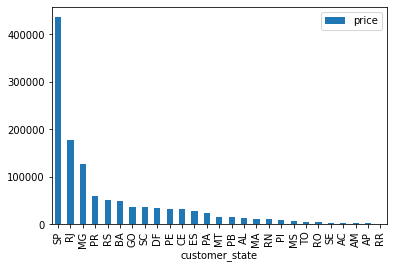

In [ ]:
wg_sales_by_area.plot(kind='bar', x='customer_state', y='price')

In [ ]:
# wg_order_by_area = watches_gifts.groupby(['customer_state'])['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)
# wg_order_by_area.head()

In [ ]:
# wg_order_by_area.plot(kind='bar', x='customer_state', y='order_id')

In [ ]:
# wg_top10_area = wg_value_by_area.sort_values(by='price', ascending=False)

In [ ]:
top5 = list(wg_sales_by_area.head(5)['customer_state'])
top5

['SP', 'RJ', 'MG', 'PR', 'RS']

In [ ]:
wg_top5_area = watches_gifts[watches_gifts['customer_state'].isin(top5)][['price', 'customer_state', 'order_delivered_customer_date']]
wg_top5_area.head()

,price,customer_state,order_delivered_customer_date
0,29.90,SP,2016-10-26 14:02:13
1,633.00,SP,2016-10-28 10:24:36
3,1399.00,RJ,2016-10-17 18:39:46
4,149.00,RJ,2017-01-17 11:38:10
5,699.17,RJ,2017-01-26 13:41:40


In [ ]:
wg_top5_area = wg_top5_area[(wg_top5_area['order_delivered_customer_date'] > '2016/12/31') & (wg_top5_area['order_delivered_customer_date'] < '2018/09/01')]

In [ ]:
wg_top5_area['YearMonth'] = wg_top5_area['order_delivered_customer_date'].dt.to_period('M')

In [ ]:
wg_top5_area_overtime = wg_top5_area.groupby(['YearMonth','customer_state'])['price'].sum().reset_index()
wg_top5_area_overtime['YearMonth']
wg_top5_area_overtime.head()

,YearMonth,customer_state,price
0,2017-01,MG,318.00
1,2017-01,RJ,848.17
2,2017-02,MG,229.90
3,2017-02,PR,442.95
4,2017-02,RJ,24.90


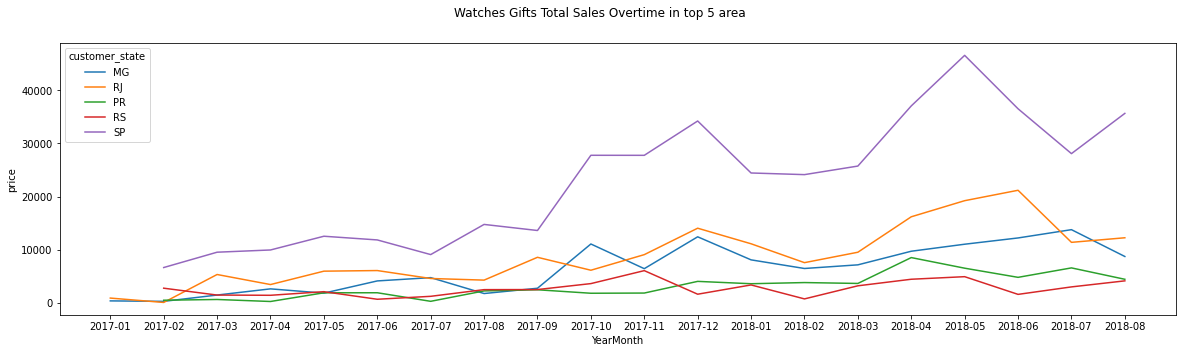

In [ ]:
wg_top5_area_overtime['YearMonth'] = wg_top5_area_overtime['YearMonth'].astype(str)
plt.figure(figsize=(20,5))
plt.suptitle('Watches Gifts Total Sales Overtime in top 5 area')

sns.lineplot(data=wg_top5_area_overtime, x='YearMonth', y='price', hue='customer_state', color='salmon')

plt.show()

### Watches Gifts Sales Geomap

In [ ]:
states = pd.read_csv('/content/gdrive/MyDrive/Olist-Dataset/states.csv')

In [ ]:
states

,UF,State,Capital,Region,Area,Population,Demographic Density,Cities count,GDP,GDP rate,Poverty,Latitude,Longitude
0,AC,Acre,Rio Branco,North,164123.738,881935,5.37,22,17201.95,0.5,0.189,-8.77,-70.55
1,AL,Alagoas,Maceió,Northeast,27843.295,3337357,119.86,102,15653.51,0.5,0.205,-9.62,-36.82
2,AM,Amazonas,Manaus,North,1559168.117,4144597,2.66,62,22936.28,0.7,0.193,-3.47,-65.10
3,AP,Amapá,Macapá,North,142470.762,845731,5.94,16,19405.11,0.6,0.128,1.41,-51.77
4,BA,Bahia,Salvador,Northeast,564722.611,14873064,26.34,417,17508.67,0.6,0.177,-13.29,-41.71
5,CE,Ceará,Fortaleza,Northeast,148894.757,9132078,61.33,184,16394.99,0.5,0.184,-5.20,-39.53
6,DF,Distrito Federal,Brasília,Center-west,5760.783,3015268,523.41,1,80502.47,2.5,0.019,-15.83,-47.86
7,ES,Espírito Santo,Vitória,Southeast,46074.444,4018650,87.22,78,28222.56,0.9,0.043,-19.19,-40.34
8,GO,Goiás,Goiânia,Center-west,340125.715,7018354,20.63,246,28308.77,0.9,0.037,-15.98,-49.86
9,MA,Maranhão,São Luís,Northeast,329642.170,7075181,21.46,217,12788.75,0.4,0.263,-5.42,-45.44


In [ ]:
brazil = states[['UF', 'State']]
brazil['Country'] = 'Brazil'
brazil

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UF,State,Country
0,AC,Acre,Brazil
1,AL,Alagoas,Brazil
2,AM,Amazonas,Brazil
3,AP,Amapá,Brazil
4,BA,Bahia,Brazil
5,CE,Ceará,Brazil
6,DF,Distrito Federal,Brazil
7,ES,Espírito Santo,Brazil
8,GO,Goiás,Brazil
9,MA,Maranhão,Brazil


In [ ]:
wg_sales_by_area.head()

,customer_state,price
0,SP,437054.29
1,RJ,177771.23
2,MG,126382.27
3,PR,59632.84
4,RS,50504.48


In [ ]:
wg_sales_by_area.shape

(27, 2)

In [ ]:
wg_sales_geomap =  pd.merge(wg_sales_by_area, brazil, how='inner', left_on='customer_state', right_on='UF')
wg_sales_geomap

,customer_state,price,UF,State,Country
0,SP,437054.29,SP,São Paulo,Brazil
1,RJ,177771.23,RJ,Rio de Janeiro,Brazil
2,MG,126382.27,MG,Minas Gerais,Brazil
3,PR,59632.84,PR,Paraná,Brazil
4,RS,50504.48,RS,Rio Grande do Sul,Brazil
5,BA,48272.42,BA,Bahia,Brazil
6,GO,36447.82,GO,Goiás,Brazil
7,SC,34995.23,SC,Santa Catarina,Brazil
8,DF,33246.16,DF,Distrito Federal,Brazil
9,PE,32218.77,PE,Pernambuco,Brazil


### watches_gifts product

In [ ]:
#@title
# product_dict= {'product_name_lenght':'mean',
#                'product_description_lenght':'mean',
#                'product_photos_qty':'mean',
#                'product_weight_g':'mean',
#                'product_length_cm':'mean',
#                'product_height_cm':'mean', 
#                'product_width_cm':'mean',
#                'price':'mean',
#                'freight_value':'mean'}

In [ ]:
#@title
product_dict= {'product_name_lenght':'mean',
               'product_description_lenght':'mean',
               'product_photos_qty':'mean',
               'product_weight_g':'mean',
               'product_length_cm':'mean',
               'product_height_cm':'mean', 
               'product_width_cm':'mean',
               'price':'mean'}

In [ ]:
#@title
wg_product = watches_gifts.groupby('product_id').agg(product_dict).reset_index()

In [ ]:
#@title
wg_product.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,199.00
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,749.99
3,00df6fc5f33cc3f7ceec4ec6337d9cd7,51.0,314.0,3.0,500.0,20.0,15.0,17.0,999.99
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,49.00


In [ ]:
#@title
wg_product['volume'] = wg_product['product_length_cm'] * wg_product['product_height_cm'] * wg_product['product_width_cm']

In [ ]:
#@title
wg_product.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,volume
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,199.00,3630.0
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,270.90,3876.0
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,749.99,2850.0
3,00df6fc5f33cc3f7ceec4ec6337d9cd7,51.0,314.0,3.0,500.0,20.0,15.0,17.0,999.99,5100.0
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,49.00,2100.0


In [ ]:
#@title
wg_product.columns

Index(['product_id', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'price', 'volume'],
      dtype='object')

In [ ]:
#@title
wg_product = wg_product[['product_id', 
                         'product_name_lenght', 
                         'product_description_lenght',
                         'product_photos_qty', 
                         'product_weight_g', 
                         'product_length_cm',
                         'product_height_cm',
                         'product_width_cm', 
                         'volume',
                          'price']]
wg_product.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,3630.0,199.00
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,3876.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,2850.0,749.99
3,00df6fc5f33cc3f7ceec4ec6337d9cd7,51.0,314.0,3.0,500.0,20.0,15.0,17.0,5100.0,999.99
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,2100.0,49.00


In [ ]:
#@title
wg_product.shape

(1300, 10)

#### Filter outliers in each feature

##### price

In [ ]:
#@title
wg_product['price'].describe()

count    1300.000000
mean      331.881790
std       404.801075
min         8.990000
25%       109.000000
50%       189.000000
75%       371.200000
max      3999.900000
Name: price, dtype: float64

In [ ]:
#@title
q1 = wg_product['price'].quantile(0.25)
q3 = wg_product['price'].quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

wg_product = wg_product[(wg_product['price'] < upper) & (wg_product['price'] > lower)]
wg_product

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,3630.0,199.00
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,3876.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,2850.0,749.99
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,2100.0,49.00
5,01365901d8f2247976a7e5d4c98c52c0,60.0,567.0,6.0,250.0,16.0,2.0,20.0,640.0,29.00
...,...,...,...,...,...,...,...,...,...,...
1293,fef80a5fb121b63bedd4096ff28f6aaa,52.0,567.0,1.0,150.0,20.0,5.0,15.0,1500.0,84.99
1294,ff55834c0b3272853dfe62340f2bb91b,52.0,150.0,4.0,250.0,16.0,2.0,11.0,352.0,45.00
1295,ff5d87897ed26d564711df324b98ebee,49.0,443.0,2.0,350.0,19.0,13.0,19.0,4693.0,274.90
1296,ff7b4560eaf93a8848cd5fde641f39c6,60.0,697.0,2.0,250.0,16.0,11.0,12.0,2112.0,179.90


##### height

In [ ]:
#@title
wg_product['product_height_cm'].describe()

count    1157.000000
mean        9.828003
std         5.089236
min         2.000000
25%         7.000000
50%        11.000000
75%        12.000000
max        45.000000
Name: product_height_cm, dtype: float64

In [ ]:
#@title
q1 = wg_product['product_height_cm'].quantile(0.25)
q3 = wg_product['product_height_cm'].quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

wg_product = wg_product[(wg_product['product_height_cm'] < upper) & (wg_product['product_height_cm'] > lower)]
wg_product

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,3630.0,199.00
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,3876.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,2850.0,749.99
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,2100.0,49.00
5,01365901d8f2247976a7e5d4c98c52c0,60.0,567.0,6.0,250.0,16.0,2.0,20.0,640.0,29.00
...,...,...,...,...,...,...,...,...,...,...
1293,fef80a5fb121b63bedd4096ff28f6aaa,52.0,567.0,1.0,150.0,20.0,5.0,15.0,1500.0,84.99
1294,ff55834c0b3272853dfe62340f2bb91b,52.0,150.0,4.0,250.0,16.0,2.0,11.0,352.0,45.00
1295,ff5d87897ed26d564711df324b98ebee,49.0,443.0,2.0,350.0,19.0,13.0,19.0,4693.0,274.90
1296,ff7b4560eaf93a8848cd5fde641f39c6,60.0,697.0,2.0,250.0,16.0,11.0,12.0,2112.0,179.90


##### length

In [ ]:
#@title
wg_product['product_length_cm'].describe()

count    1129.000000
mean       18.982285
std         6.225494
min        11.000000
25%        16.000000
50%        17.000000
75%        19.000000
max       105.000000
Name: product_length_cm, dtype: float64

In [ ]:
#@title
q1 = wg_product['product_length_cm'].quantile(0.25)
q3 = wg_product['product_length_cm'].quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

wg_product = wg_product[(wg_product['product_length_cm'] < upper) & (wg_product['product_length_cm'] > lower)]
wg_product

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,3630.0,199.00
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,3876.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,2850.0,749.99
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,2100.0,49.00
5,01365901d8f2247976a7e5d4c98c52c0,60.0,567.0,6.0,250.0,16.0,2.0,20.0,640.0,29.00
...,...,...,...,...,...,...,...,...,...,...
1292,feeed1b9f26cce6eb3cb81af65eddd9e,42.0,139.0,1.0,700.0,18.0,12.0,16.0,3456.0,182.00
1293,fef80a5fb121b63bedd4096ff28f6aaa,52.0,567.0,1.0,150.0,20.0,5.0,15.0,1500.0,84.99
1294,ff55834c0b3272853dfe62340f2bb91b,52.0,150.0,4.0,250.0,16.0,2.0,11.0,352.0,45.00
1295,ff5d87897ed26d564711df324b98ebee,49.0,443.0,2.0,350.0,19.0,13.0,19.0,4693.0,274.90


##### width

In [ ]:
#@title
wg_product['product_width_cm'].describe()

count    1022.000000
mean       14.035225
std         3.259692
min        11.000000
25%        11.000000
50%        13.000000
75%        16.000000
max        27.000000
Name: product_width_cm, dtype: float64

In [ ]:
#@title
q1 = wg_product['product_width_cm'].quantile(0.25)
q3 = wg_product['product_width_cm'].quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

wg_product = wg_product[(wg_product['product_width_cm'] < upper) & (wg_product['product_width_cm'] > lower)]
wg_product

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,3630.0,199.00
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,3876.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,2850.0,749.99
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,2100.0,49.00
5,01365901d8f2247976a7e5d4c98c52c0,60.0,567.0,6.0,250.0,16.0,2.0,20.0,640.0,29.00
...,...,...,...,...,...,...,...,...,...,...
1292,feeed1b9f26cce6eb3cb81af65eddd9e,42.0,139.0,1.0,700.0,18.0,12.0,16.0,3456.0,182.00
1293,fef80a5fb121b63bedd4096ff28f6aaa,52.0,567.0,1.0,150.0,20.0,5.0,15.0,1500.0,84.99
1294,ff55834c0b3272853dfe62340f2bb91b,52.0,150.0,4.0,250.0,16.0,2.0,11.0,352.0,45.00
1295,ff5d87897ed26d564711df324b98ebee,49.0,443.0,2.0,350.0,19.0,13.0,19.0,4693.0,274.90


##### weight

In [ ]:
#@title
wg_product['product_weight_g'].describe()

count     1012.000000
mean       438.310277
std       1065.398498
min         50.000000
25%        250.000000
50%        300.000000
75%        445.500000
max      22175.000000
Name: product_weight_g, dtype: float64

In [ ]:
#@title
q1 = wg_product['product_weight_g'].quantile(0.25)
q3 = wg_product['product_weight_g'].quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

wg_product = wg_product[(wg_product['product_weight_g'] < upper) & (wg_product['product_weight_g'] > lower)]
wg_product

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,3630.0,199.00
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,3876.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,2850.0,749.99
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,2100.0,49.00
5,01365901d8f2247976a7e5d4c98c52c0,60.0,567.0,6.0,250.0,16.0,2.0,20.0,640.0,29.00
...,...,...,...,...,...,...,...,...,...,...
1292,feeed1b9f26cce6eb3cb81af65eddd9e,42.0,139.0,1.0,700.0,18.0,12.0,16.0,3456.0,182.00
1293,fef80a5fb121b63bedd4096ff28f6aaa,52.0,567.0,1.0,150.0,20.0,5.0,15.0,1500.0,84.99
1294,ff55834c0b3272853dfe62340f2bb91b,52.0,150.0,4.0,250.0,16.0,2.0,11.0,352.0,45.00
1295,ff5d87897ed26d564711df324b98ebee,49.0,443.0,2.0,350.0,19.0,13.0,19.0,4693.0,274.90


##### photo quantity

In [ ]:
#@title
wg_product['product_photos_qty'].describe()

count    980.000000
mean       2.237755
std        1.518562
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: product_photos_qty, dtype: float64

In [ ]:
#@title
q1 = wg_product['product_photos_qty'].quantile(0.25)
q3 = wg_product['product_photos_qty'].quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

wg_product = wg_product[(wg_product['product_photos_qty'] < upper) & (wg_product['product_photos_qty'] > lower)]
wg_product

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,3630.0,199.00
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,3876.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,2850.0,749.99
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,2100.0,49.00
7,014d94f219fbff1166b9cf700eee36b2,50.0,556.0,1.0,400.0,18.0,12.0,12.0,2592.0,199.90
...,...,...,...,...,...,...,...,...,...,...
1292,feeed1b9f26cce6eb3cb81af65eddd9e,42.0,139.0,1.0,700.0,18.0,12.0,16.0,3456.0,182.00
1293,fef80a5fb121b63bedd4096ff28f6aaa,52.0,567.0,1.0,150.0,20.0,5.0,15.0,1500.0,84.99
1294,ff55834c0b3272853dfe62340f2bb91b,52.0,150.0,4.0,250.0,16.0,2.0,11.0,352.0,45.00
1295,ff5d87897ed26d564711df324b98ebee,49.0,443.0,2.0,350.0,19.0,13.0,19.0,4693.0,274.90


##### description length

In [ ]:
#@title
wg_product['product_description_lenght'].describe()

count     934.000000
mean      626.885439
std       345.374055
min        66.000000
25%       443.500000
50%       576.000000
75%       720.250000
max      3355.000000
Name: product_description_lenght, dtype: float64

In [ ]:
#@title
q1 = wg_product['product_description_lenght'].quantile(0.25)
q3 = wg_product['product_description_lenght'].quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

wg_product = wg_product[(wg_product['product_description_lenght'] < upper) & (wg_product['product_description_lenght'] > lower)]
wg_product

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,3630.0,199.00
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,3876.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,2850.0,749.99
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,2100.0,49.00
7,014d94f219fbff1166b9cf700eee36b2,50.0,556.0,1.0,400.0,18.0,12.0,12.0,2592.0,199.90
...,...,...,...,...,...,...,...,...,...,...
1292,feeed1b9f26cce6eb3cb81af65eddd9e,42.0,139.0,1.0,700.0,18.0,12.0,16.0,3456.0,182.00
1293,fef80a5fb121b63bedd4096ff28f6aaa,52.0,567.0,1.0,150.0,20.0,5.0,15.0,1500.0,84.99
1294,ff55834c0b3272853dfe62340f2bb91b,52.0,150.0,4.0,250.0,16.0,2.0,11.0,352.0,45.00
1295,ff5d87897ed26d564711df324b98ebee,49.0,443.0,2.0,350.0,19.0,13.0,19.0,4693.0,274.90


##### name length

In [ ]:
#@title
wg_product['product_name_lenght'].describe()

count    855.000000
mean      49.970760
std        8.361719
min       19.000000
25%       45.000000
50%       52.000000
75%       57.000000
max       62.000000
Name: product_name_lenght, dtype: float64

In [ ]:
#@title
q1 = wg_product['product_name_lenght'].quantile(0.25)
q3 = wg_product['product_name_lenght'].quantile(0.75)
iqr = q3 - q1

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

wg_product = wg_product[(wg_product['product_name_lenght'] < upper) & (wg_product['product_name_lenght'] > lower)]
wg_product

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,3630.0,199.00
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,3876.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,2850.0,749.99
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,2100.0,49.00
7,014d94f219fbff1166b9cf700eee36b2,50.0,556.0,1.0,400.0,18.0,12.0,12.0,2592.0,199.90
...,...,...,...,...,...,...,...,...,...,...
1292,feeed1b9f26cce6eb3cb81af65eddd9e,42.0,139.0,1.0,700.0,18.0,12.0,16.0,3456.0,182.00
1293,fef80a5fb121b63bedd4096ff28f6aaa,52.0,567.0,1.0,150.0,20.0,5.0,15.0,1500.0,84.99
1294,ff55834c0b3272853dfe62340f2bb91b,52.0,150.0,4.0,250.0,16.0,2.0,11.0,352.0,45.00
1295,ff5d87897ed26d564711df324b98ebee,49.0,443.0,2.0,350.0,19.0,13.0,19.0,4693.0,274.90


#### watches_gifts correlation: feature and price

In [ ]:
#@title
wg_product

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
0,000d9be29b5207b54e86aa1b1ac54872,48.0,613.0,4.0,250.0,22.0,11.0,15.0,3630.0,199.00
1,008b51e6be49ee039854b5e35c331b02,57.0,676.0,2.0,633.0,19.0,12.0,17.0,3876.0,270.90
2,00cc15e0cef551848c797ab75ba904b1,47.0,596.0,1.0,300.0,19.0,10.0,15.0,2850.0,749.99
4,0127db1f4effcf8f5b88d80588bc5624,53.0,555.0,1.0,200.0,20.0,7.0,15.0,2100.0,49.00
7,014d94f219fbff1166b9cf700eee36b2,50.0,556.0,1.0,400.0,18.0,12.0,12.0,2592.0,199.90
...,...,...,...,...,...,...,...,...,...,...
1292,feeed1b9f26cce6eb3cb81af65eddd9e,42.0,139.0,1.0,700.0,18.0,12.0,16.0,3456.0,182.00
1293,fef80a5fb121b63bedd4096ff28f6aaa,52.0,567.0,1.0,150.0,20.0,5.0,15.0,1500.0,84.99
1294,ff55834c0b3272853dfe62340f2bb91b,52.0,150.0,4.0,250.0,16.0,2.0,11.0,352.0,45.00
1295,ff5d87897ed26d564711df324b98ebee,49.0,443.0,2.0,350.0,19.0,13.0,19.0,4693.0,274.90


In [ ]:
#@title
wg_product.corr().style.background_gradient(cmap='Blues')
#size
#correlation chi nen noi 1 lan

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume,price
product_name_lenght,1.000000,-0.022252,0.321039,-0.257559,-0.315056,-0.327441,-0.086221,-0.340570,-0.221856
product_description_lenght,-0.022252,1.000000,-0.023017,0.060824,0.089949,0.314293,-0.020856,0.221161,0.230615
product_photos_qty,0.321039,-0.023017,1.000000,-0.207752,-0.314009,-0.445352,-0.047905,-0.394181,-0.202265
product_weight_g,-0.257559,0.060824,-0.207752,1.000000,0.207929,0.322731,0.051734,0.304223,0.429477
product_length_cm,-0.315056,0.089949,-0.314009,0.207929,1.000000,0.366190,0.391269,0.656215,0.160327
product_height_cm,-0.327441,0.314293,-0.445352,0.322731,0.366190,1.000000,0.165197,0.864110,0.467585
product_width_cm,-0.086221,-0.020856,-0.047905,0.051734,0.391269,0.165197,1.000000,0.511605,0.023398
volume,-0.340570,0.221161,-0.394181,0.304223,0.656215,0.864110,0.511605,1.000000,0.378354
price,-0.221856,0.230615,-0.202265,0.429477,0.160327,0.467585,0.023398,0.378354,1.000000


In [ ]:
#@title
gds_wg_product = wg_product.corr().reset_index()
gds_wg_product.rename(columns={'index':'Feature', 'price':'Price'}, inplace=True)
gds_wg_product = gds_wg_product[['Feature', 'Price']].round(2)

In [ ]:
#@title
gds_wg_product.loc[0,'Feature'] = 'Name Length'
gds_wg_product.loc[1,'Feature'] = 'Description Length'
gds_wg_product.loc[2,'Feature'] = 'Photo Quantity'
gds_wg_product.loc[3,'Feature'] = 'Weight (g)'
gds_wg_product.loc[4,'Feature'] = 'Length (cm)'
gds_wg_product.loc[5,'Feature'] = 'Height (cm)'
gds_wg_product.loc[6,'Feature'] = 'Width (cm)'
gds_wg_product.loc[7,'Feature'] = 'Volume (cm3)'
gds_wg_product.loc[8,'Feature'] = 'Price'
gds_wg_product

,Feature,Price
0,Name Length,-0.22
1,Description Length,0.23
2,Photo Quantity,-0.20
3,Weight (g),0.43
4,Length (cm),0.16
5,Height (cm),0.47
6,Width (cm),0.02
7,Volume (cm3),0.38
8,Price,1.00


##II.Machine Learning:Product Segmentation using Kmeans

* Product information feature
* Product size feature

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

### bed_bath_table product

#### All feature

In [ ]:
bbt_feature.columns

In [ ]:
bbt_info = bbt_feature

In [ ]:
all_feature = ['product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'price']

In [ ]:
bbt_info[all_feature]

In [ ]:
X_bbt_info = bbt_info[all_feature].values
X_bbt_info

In [ ]:
X_bbt_info_scaled = scaler.fit_transform(X_bbt_info)
X_bbt_info_scaled

In [ ]:
# Using Elbow method to approximate the number of clusters.
# YOUR CODE HERE
k_range = range(1, 20)

wcss = []
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_bbt_info_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(k_range, wcss)
plt.xticks(k_range)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_bbt_info_scaled)

In [ ]:
bbt_info['bbt_ProductCluster'] = clusters
bbt_info

In [ ]:
bbt_info.groupby('bbt_ProductCluster')[all_feature].mean()

In [ ]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    """Rearange cluster in such order that the higher the recency, the less the value 
       that customer brings to us, so higher recency should result in a lower score."""

    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    
    return df_final

# recency = order_cluster('RecencyCluster', 'Recency', recency, False)
bbt_info = order_cluster('bbt_ProductCluster', 'price', bbt_info, True)

In [ ]:
bbt_info.groupby('bbt_ProductCluster')[all_feature].mean()

In [ ]:
bbt_info

In [ ]:
bbt_feature.corr().style.background_gradient(cmap='Blues')

### watches_gifts product

##### All feature

In [ ]:
wg_feature.head()

In [ ]:
wg_feature.columns

In [ ]:
wg_info = wg_feature

In [ ]:
all_feature = ['product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm', 'price']

In [ ]:
wg_info[all_feature]

In [ ]:
X_wg_info = wg_info[all_feature].values
X_wg_info

In [ ]:
X_wg_info_scaled = scaler.fit_transform(X_wg_info)
X_wg_info_scaled

In [ ]:
# Using Elbow method to approximate the number of clusters.
# YOUR CODE HERE
k_range = range(1, 20)

wcss = []
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_wg_info_scaled)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(k_range, wcss)
plt.xticks(k_range)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_wg_info_scaled)

In [ ]:
wg_info['wg_ProductCluster'] = clusters
wg_info

In [ ]:
wg_info.groupby('wg_ProductCluster')['price'].describe()

In [ ]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    """Rearange cluster in such order that the higher the recency, the less the value 
       that customer brings to us, so higher recency should result in a lower score."""

    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    
    return df_final

# recency = order_cluster('RecencyCluster', 'Recency', recency, False)
wg_info = order_cluster('wg_ProductCluster', 'price', wg_info, True)

In [ ]:
wg_info.groupby('wg_ProductCluster')[all_feature].mean().round(2)

In [ ]:
# wg_feature.corr().style.background_gradient(cmap='Blues')

In [ ]:
all_product_corr = all_product_size.corr().reset_index()
all_product_corr

## Google Data Studio

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Create a new Google Spreadsheets
#sh = gc.create('Olist-FinalProject1')

1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4

In [ ]:
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
      worksheet_name: name of sheet in spreadsheet
      worksheet_id (int): 0, 1, 2, ... 
      data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    
    # To create a new worksheet with 1000 rows and 26 columns
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

    # For writing to an existing worksheet
    # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

    set_with_dataframe(worksheet, data)

15Ng12c4HdG7jp9ctGrS-KYmZOuxcmN-81WnCt0eZCH0 Nguyễn

In [ ]:
export_data_to_new_sheet('1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4','pct_top10_cate',pct_top10_cate)

In [ ]:
wg_top5_area_overtime_line = pd.merge(wg_top5_area_overtime, brazil, how='inner', left_on='customer_state', right_on='UF')
wg_top5_area_overtime_line

,YearMonth,customer_state,price,UF,State,Country
0,2017-01,MG,318.00,MG,Minas Gerais,Brazil
1,2017-02,MG,229.90,MG,Minas Gerais,Brazil
2,2017-03,MG,1420.23,MG,Minas Gerais,Brazil
3,2017-04,MG,2586.32,MG,Minas Gerais,Brazil
4,2017-05,MG,1780.29,MG,Minas Gerais,Brazil
...,...,...,...,...,...,...
92,2018-04,SP,37084.07,SP,São Paulo,Brazil
93,2018-05,SP,46619.30,SP,São Paulo,Brazil
94,2018-06,SP,36544.91,SP,São Paulo,Brazil
95,2018-07,SP,28088.73,SP,São Paulo,Brazil


In [ ]:
export_data_to_new_sheet('1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4','wg_top5_area_overtime_line',wg_top5_area_overtime_line)

In [ ]:
export_data_to_new_sheet('1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4','no_of_seller_overtime',no_of_seller_overtime)

In [ ]:
no_of_seller_overtime=no_of_seller_overtime.reset_index()

In [ ]:
export_data_to_new_sheet('1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4','sales_overtime',sales_overtime)

In [ ]:
export_data_to_new_sheet('1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4','category_sellers',category_sellers)

In [ ]:
export_data_to_new_sheet('1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4','sellers_price',sellers_price)

In [ ]:
export_data_to_new_sheet('1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4','top2_price',top2_price)

In [ ]:
export_data_to_new_sheet('1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4','bbt_feature',bbt_feature)

In [ ]:
export_data_to_new_sheet('1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4','wg_feature',wg_feature)

In [ ]:
final_products_sellers.shape

In [ ]:
export_data_to_new_sheet('1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4','wg_sales_geomap',wg_sales_geomap)

In [ ]:
gds_wg_product.loc[0:3,:]

,Feature,Price
0,Name Length,-0.22
1,Description Length,0.23
2,Photo Quantity,-0.20
3,Weight (g),0.43


In [ ]:
gds_wg_product.loc[7:8,:]

,Feature,Price
7,Volume (cm3),0.38
8,Price,1.00


In [ ]:
gds_wg_product_feature = pd.concat([gds_wg_product.loc[0:3,:], gds_wg_product.loc[7:8,:]], axis=0, ignore_index=True).reset_index()
gds_wg_product_feature

,index,Feature,Price
0,0,Name Length,-0.22
1,1,Description Length,0.23
2,2,Photo Quantity,-0.20
3,3,Weight (g),0.43
4,4,Volume (cm3),0.38
5,5,Price,1.00


In [ ]:
export_data_to_new_sheet('1zC77U8sw7eKC3XmEfbLTBlVsSE-p5mkP1-Ca73VvWf4','gds_wg_product_feature',gds_wg_product_feature)